**WINE QUALITY PREDICTION**

**INTRODUCTION:**

The wine quality dataset is used for regression analysis tasks, particularly in the domain of predictive modeling and machine learning. It contains various chemical attributes of wine samples along with their associated quality ratings, which serve as the target variable for regression analysis.

The primary objective of analyzing the wine quality dataset is to develop regression models that can accurately predict the quality rating of wine samples based on their chemical attributes.

**DATA UNDERSTANDING AND PREPROCESSING:**

1. Exploratory Data Analysis (EDA) to understand the distribution and relationships between different features and the target variable.
2. Preprocessing the data by handling missing values, scaling features if necessary, and encoding categorical variables.
3. Splitting the dataset into training and testing sets.
Building and evaluating regression models using techniques such as Ordinary Least Squares (OLS), regression trees, Support Vector Regression (SVR), and Multi-layer Perceptron (MLP) neural networks.
4. Comparing the performance of these models using appropriate evaluation metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) coefficient.



**VARIABLES DESCRIPTION:**

**Fixed Acidity**:Concentration of non-volatile acids in wine, influencing overall acidity.

**Volatile Acidity**:Concentration of volatile acids, affecting flavor and aroma.

**Citric Acid**:Presence of citric acid, contributing to freshness and balance.

**Residual Sugar**:Remaining sugar after fermentation, influencing sweetness.

**Chlorides**:Concentration of chlorides, impacting taste with excessive levels.

**Free Sulfur Dioxide**:Amount of free SO2, acting as antioxidant and antimicrobial agent.

**Total Sulfur Dioxide**:Total SO2 concentration, affecting wine preservation and stability.

**Density**:Density of wine, influenced by sugar and alcohol content.

**pH**:Acidity or alkalinity level, influencing taste and microbial activity.

**Sulphates**:Concentration of sulfates, contributing to preservation and antioxidants.

**Alcohol**:Alcohol content, influencing body, flavor, and warmth.

**Quality**:Rating representing overall quality of wine, ranging from 1 (lowest) to 10 (highest).

**UPLOAD AND CLEAN DATA**

Step 1: Import the necessary python libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Step 2: Load the wine dataset to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 3: Read the data from thewinequality-red.csv file

In [ ]:
wine = pd.read_csv("/content/drive/MyDrive/IS670_data/winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Step 4: Display all the data types of the wine dataset

In [ ]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Step 5: Examine the first few rows of the dataset to have a better understanding

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Step 6: Generate the correlation matrix of all numeric variables

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Step 7: Check for any missing values

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Step 8: Show the statistics of numeric variables

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Step 9: IQR of Alcohol variable

In [ ]:
IQR = wine['alcohol'].quantile(0.75) - wine['alcohol'].quantile(0.25)
print("IQR:", IQR)

IQR: 1.5999999999999996


**VISUALIZATION OF THE DATA**

**Histogram of target variable 'quality'**

Text(0.5, 1.0, 'Distribution of Wine Quality Ratings')

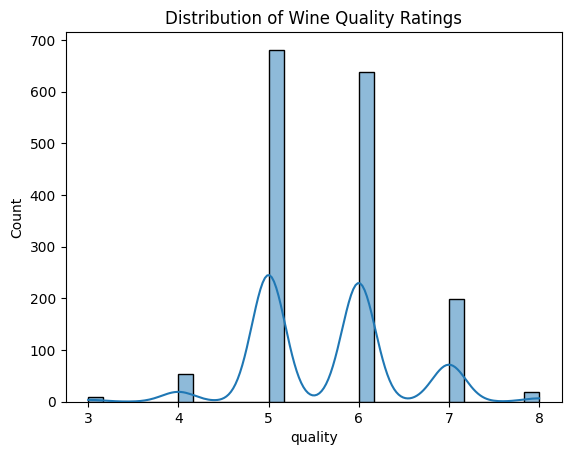

In [ ]:
sb.histplot(data=wine, x="quality", kde=True)
plt.title('Distribution of Wine Quality Ratings')

Most wines are rated 5 or 6 according to the graph.

Step 10: Histogram of numeric variable 'alcohol'.

Text(0.5, 1.0, 'Histogram of alcohol in the wine data set')

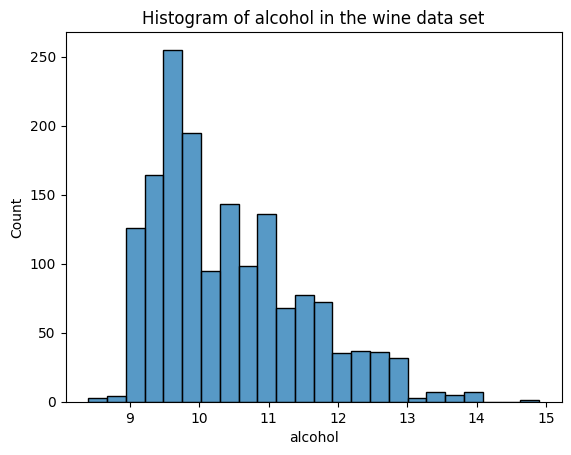

In [ ]:
snsplot = sb.histplot(x='alcohol', data = wine)
snsplot.set_title("Histogram of alcohol in the wine data set")

The above histogram displays the frequency distribution of alcohol content levels in the wine dataset, revealing the count of samples falling within specific alcohol content ranges. Maximum or the highest count is 250 for alcohol level 9.5.

Step 11: Scatterplot of numeric variables fixed acidity and citric acid.

Text(0.5, 1.0, 'Scatterplot of fixed acidity and citric acid')

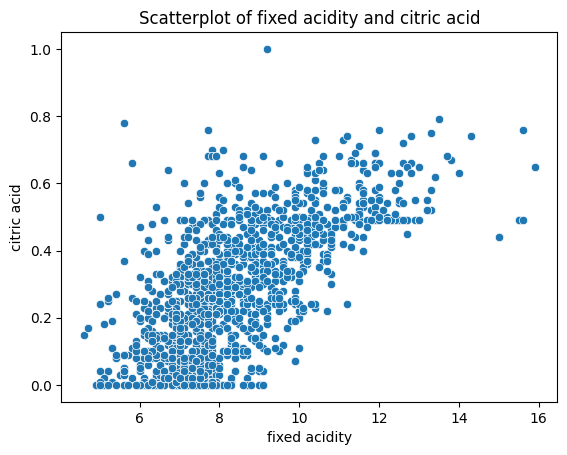

In [ ]:
snsplot = sb.scatterplot(x='fixed acidity', y= 'citric acid', data=wine)
snsplot.set_title("Scatterplot of fixed acidity and citric acid")

The Scatterplot of Fixed Acidity versus Citric acid across the range of 0 to 12 on the x-axis and 0.6 on the y-axis, and a few in 12-16 range suggesting a varied relationship between Fixed Acidity and Citric acid.

Step 12: Bar chart of numeric variable 'alcohol' with the target 'quality'.

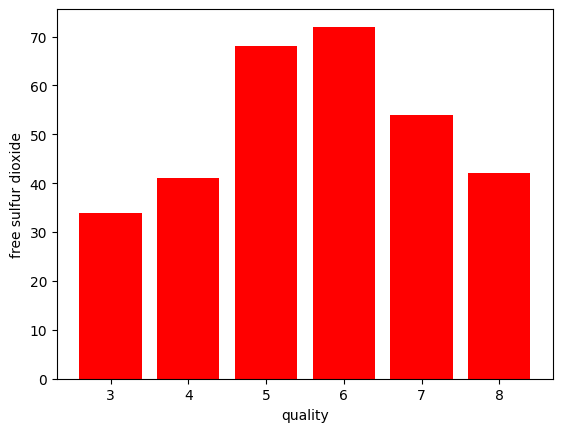

In [ ]:
plt.bar(wine['quality'], wine['free sulfur dioxide'],color='red')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.show()

The above bar chart illustrates the relationship between wine quality ratings and free sulfur dioxide content, showcasing how free sulfur dioxide content varies across different quality levels.
The highest free sulfur dioxide content value of 72 is associated with wines rated as quality 6.The alcohol content value of 34 is associated with wines rated as quality 3.


Step 13: Heat Map of all numeric variables.

<Axes: >

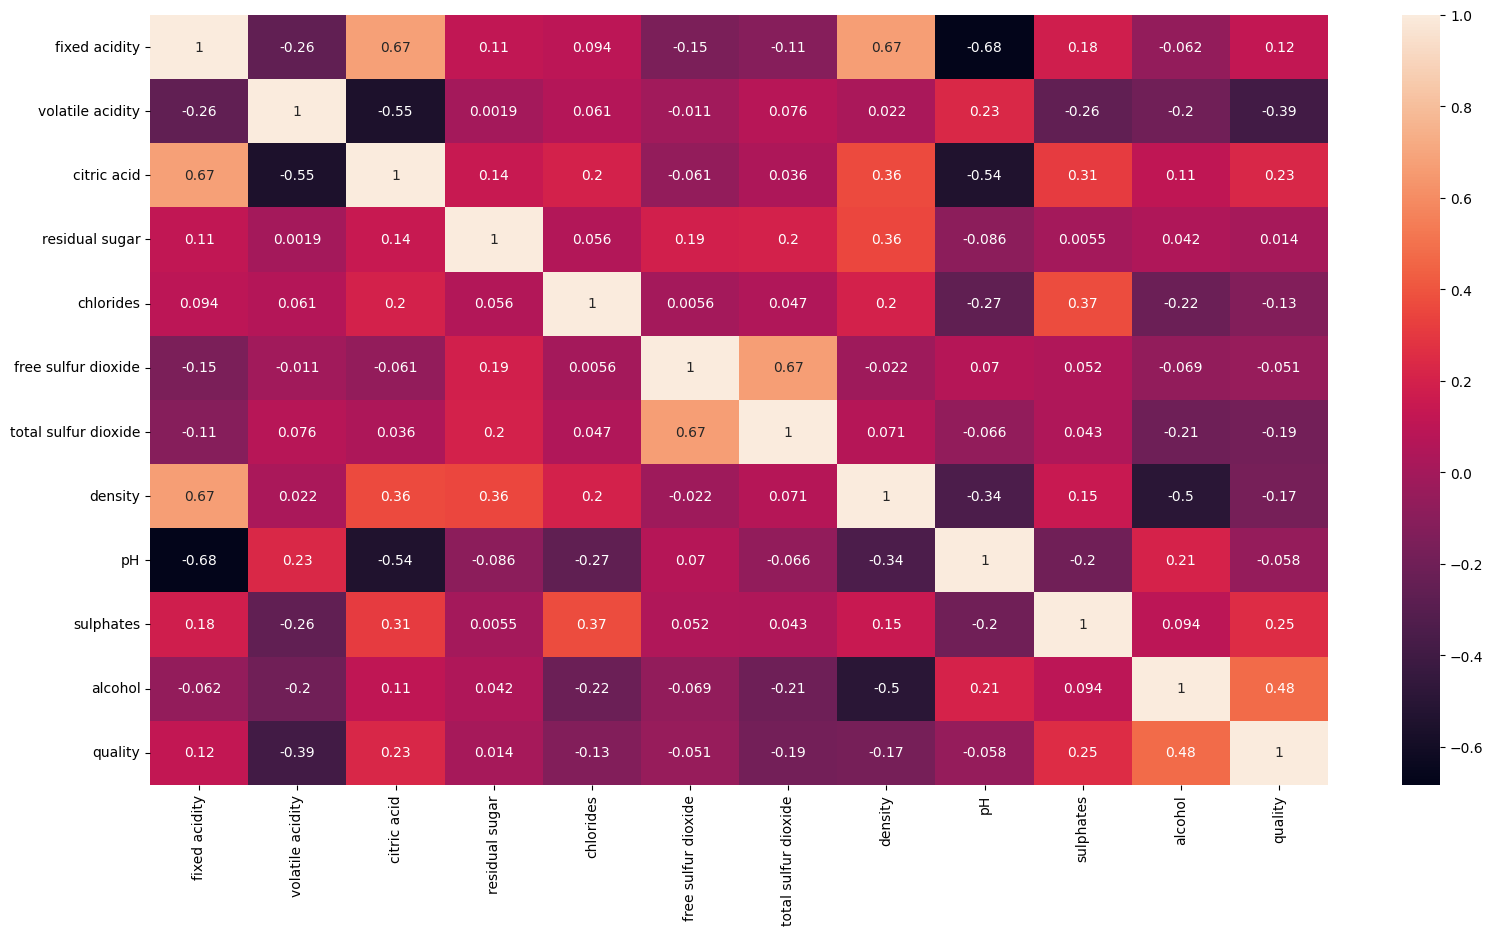

In [ ]:
plt.figure(figsize=[19,10])
sb.heatmap(wine.corr(),annot=True)


The above heatmap displays the correlation coefficients between pairs of variables in the wine dataset, highlighting the strength and direction of their linear relationships. Higher absolute values indicate stronger correlations, interdependencies among variables such as acidity, sugar, sulfates, alcohol, and quality.Here 0.67 indicating strong and -0.68 representing weak corelation among the variables.

Total Sulfur Dioxide and Free Sulfur Dioxide are moderately positively correlated.
Density and Alcohol are moderately negatively correlated.
Fixed Acidity and Citric Acid exhibit a moderate positive correlation.
Fixed Acidity and pH have a weak negative correlation.







Step 14:Boxplot of numeric variable Sulphates

(0.0, 1.5)

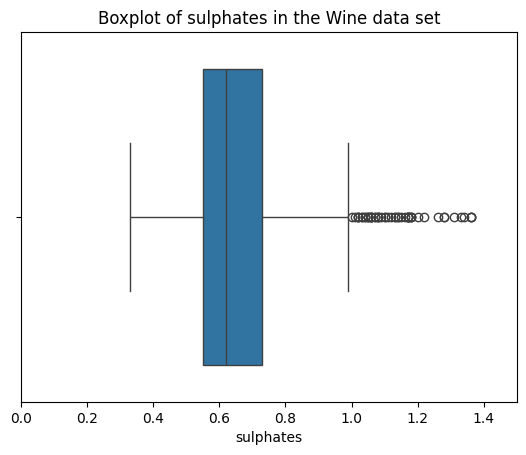

In [ ]:
snsplot = sb.boxplot(x='sulphates', data = wine)
snsplot.set_title("Boxplot of sulphates in the Wine data set")
snsplot.set_xlim([0, 1.5])

Boxplot of Sulphates variable shows minimum count 0.56 and maximum count 0.72. It displays range of outliers after the count 1.

Step 15: Boxplot of all numeric variables.

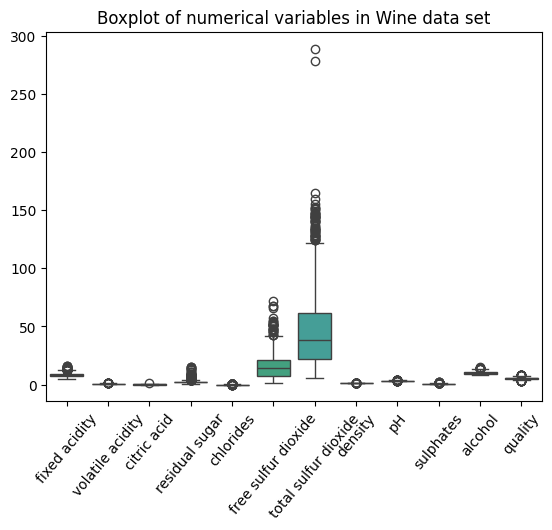

<Figure size 1000x600 with 0 Axes>

In [ ]:
snsplot = sb.boxplot(data = wine)
snsplot.set_title("Boxplot of numerical variables in Wine data set")
plt.xticks(rotation=50)
plt.figure(figsize=(10, 6))
plt.show()

The boxplot shows that chlorides and free sulfur dioxide are involved, but some stand out as outliers, they are significantly different from the rest.

**DATA BALANCING AND PARTITIONING**

Step 16: Identifying variable pairs with correlation coefficients above 0.7 in absolute value.

In [ ]:
for a in range(len(wine.corr().columns)):
    for b in range(a):
        if abs(wine.corr().iloc[a,b]) >0.7:
            name = wine.corr().columns[a]
            print(name)

 Step 17: Create a new DataFrame wine_new by dropping the column 'total sulfur dioxide' along the columns axis from the original DataFrame 'wine'.

In [ ]:
wine_new = wine.drop('total sulfur dioxide', axis=1)

Step 18: Add a new column 'best quality' to the DataFrame 'wine_new', assigning a value of 1 if the quality rating is greater than 5, and 0 otherwise, using a list comprehension.

In [ ]:
wine_new['best quality'] = [1 if x > 5 else 0 for x in wine.quality]

Step 19: Check the proportion of the target variable best quality by examining the count of 1 and 0 to ensure that dataset is representative.

In [ ]:
features = wine_new.drop(['quality', 'best quality'], axis=1)
target = wine_new['best quality']
print(target.value_counts(normalize=True))

best quality
1    0.534709
0    0.465291
Name: proportion, dtype: float64


Step 20: Partition the data

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1119, 10) (480, 10) (1119,) (480,)


Step 21: Apply minmax normalization on predictors

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(predictors_train)
xtest = norm.transform(predictors_test)

**MODEL DEVELOPMENT:**

**SIMPLE LINEAR REGRESSION:**

Step 22:Build a simple linear regression model with only alcohol as predictor.

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(predictors_train[['alcohol']], target_train)

LinearRegression()

Step 23: Show model summary

In [ ]:
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['alcohol']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           best quality   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     231.1
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.39e-47
Time:                        03:10:40   Log-Likelihood:                -703.85
No. Observations:                1119   AIC:                             1412.
Df Residuals:                    1117   BIC:                             1422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4822      0.134    -11.102      0.0

Step 24:Make predictions on testing data.

In [ ]:
prediction_on_test = model1.predict(predictors_test[['alcohol']])

Step 25: Examine the evaluation results on testing data: MAE and RMSE

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.4019960923232704
RMSE: 0.43856593290200313


Step 26: Coefficient plot of alcohol variable.

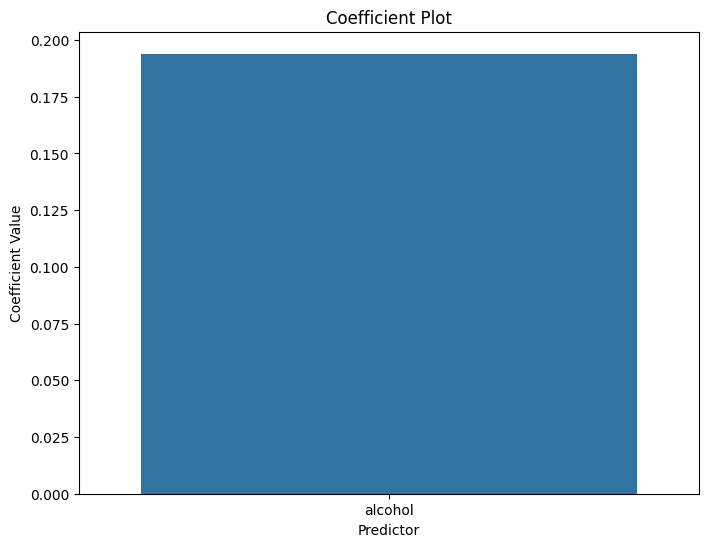

In [ ]:
coefficients = model1.coef_
plt.figure(figsize=(8, 6))
sb.barplot(x=predictors_train[['alcohol']].columns, y=coefficients)
plt.title('Coefficient Plot')
plt.xlabel('Predictor')
plt.ylabel('Coefficient Value')
plt.show()

The coefficient plot of alcohol variable indicates that a unit increase in alcohol content is associated with a 0.1940 unit increase in quality rating on average

Step 27: Scatterplot of alcohol variable with target Quality

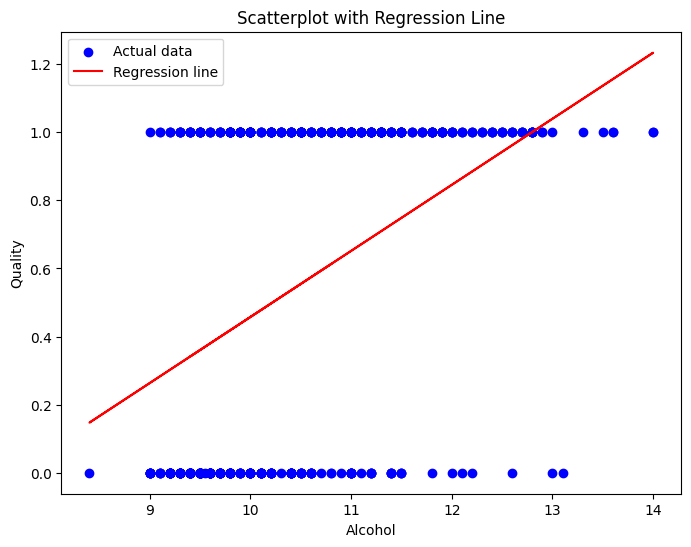

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(predictors_test[['alcohol']], target_test, color='blue', label='Actual data')
plt.plot(predictors_test[['alcohol']], model1.predict(predictors_test[['alcohol']]), color='red', label='Regression line')
plt.title('Scatterplot with Regression Line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()
plt.show()

This scatterplot with a regression line visualizes the relationship between the predictor variable 'alcohol' and the target variable ( best quality). The blue dots at 0 and 1 represent the actual data points, while the red line represents the linear regression model's prediction of the target variable based on alcohol content.

**MULTIPLE LINEAR REGRESSION:**

Step 28: Build a multiple linear regression model with all predictors.

In [ ]:
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

Step 29: Show model summary

In [ ]:
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           best quality   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     41.75
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           2.63e-70
Time:                        03:10:41   Log-Likelihood:                -630.16
No. Observations:                1119   AIC:                             1282.
Df Residuals:                    1108   BIC:                             1338.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.9732    

Step 30: Make predictions on testing data.

In [ ]:
prediction_on_test = model2.predict(predictors_test)

Step 31: Examine the evaluation results on testing data: MAE and RMSE.

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.3759812002977029
RMSE: 0.42383822184830366


Step 32: Calculating the residuals and plotting the residual histogram plot.

In [ ]:
residuals = target_test - prediction_on_test

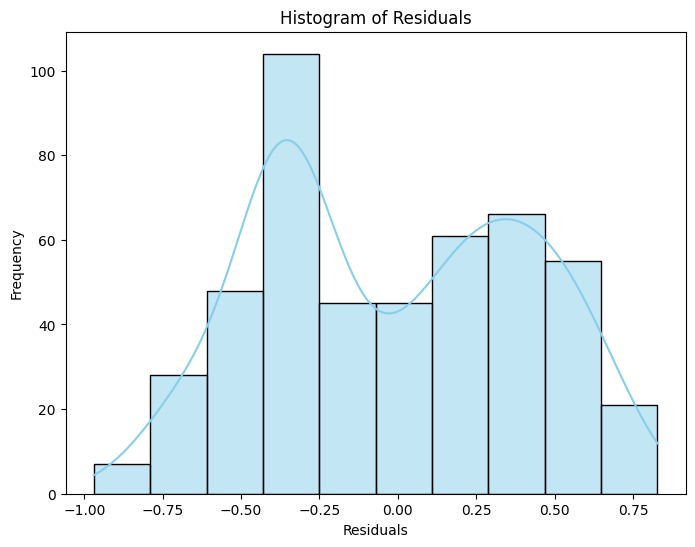

In [ ]:
plt.figure(figsize=(8, 6))
sb.histplot(residuals, kde=True, color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

A symmetric, bell-shaped histogram centered around zero suggests that the residuals follow a normal distribution, which is desirable for regression analysis. Deviations from this pattern may indicate issues such as nonlinearity, heteroscedasticity, or outliers in the model. The maximum frequency of residuals is 105 and minimum is 8.

Step 33: Density plot of residuals against density variable

<ipython-input-36-27aaf3023c36>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(residuals, color='green', shade=True)


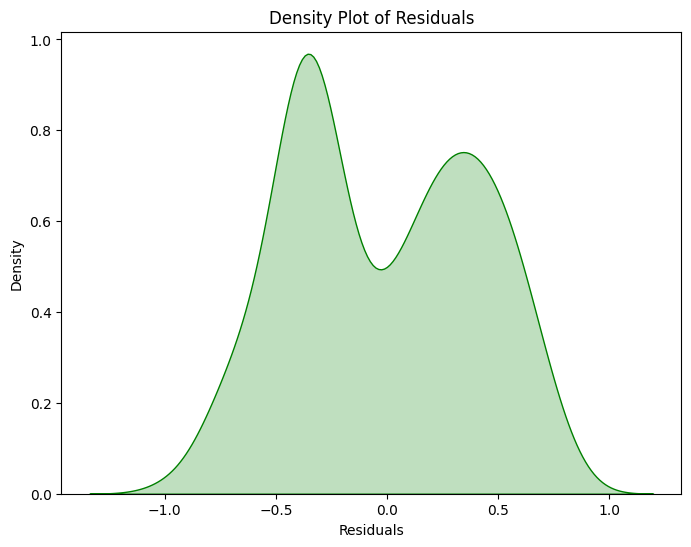

In [ ]:
plt.figure(figsize=(8, 6))
sb.kdeplot(residuals, color='green', shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

A bell-shaped curve centered at zero suggests that the residuals follow a normal distribution, which is desirable for regression analysis. Deviations from this pattern may indicate issues such as nonlinearity, heteroscedasticity, or outliers in the model.The highest density that residuals at value -0.4 have is 0.98.

**Significance of 3 most important variables:**

**Alcohol:** Alcohol content is be one of the most significant factors affecting the quality of wine. Higher alcohol content might lead to better quality in some cases, as it can contribute to the flavor profile and overall experience of the wine.
Wines with higher alcohol content can have better quality, in terms of richness and body. However, excessively high alcohol levels might also negatively affect the balance and harmony of the wine, leading to lower quality ratings.

**Volatile Acidity:** Volatile acidity refers to the presence of volatile acids in wine, primarily acetic acid. High levels of volatile acidity can lead to unpleasant aromas and flavors, such as vinegar-like or nail polish remover-like odors.
In general, lower levels of volatile acidity are associated with higher quality wines, as excessive volatile acidity can detract from the overall sensory experience. Wines with well-balanced acidity tend to be more harmonious and enjoyable.

**Sulphates:** Sulphates, specifically sulfur dioxide (SO2), are commonly used as preservatives in wine making to prevent oxidation and microbial spoilage. They can also contribute to the aroma and flavor stability of wine and maintain the freshness and longevity of wine. Wines with appropriate levels of sulphates are less prone to spoilage and oxidation, which can positively impact their quality. However, excessive use of sulphates can sometimes lead to undesirable sulfurous aromas or harsh flavors, negatively affecting quality.

**REGRESSION TREE:**

Step 34:Build a regression tree model with max_depth=3 and plot the tree.

In [ ]:
model3 = DecisionTreeRegressor(random_state=0, max_depth=3)
model3.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'alcohol <= 10.017\nsquared_error = 0.249\nsamples = 1119\nvalue = 0.537'),
 Text(0.25, 0.625, 'sulphates <= 0.575\nsquared_error = 0.22\nsamples = 525\nvalue = 0.328'),
 Text(0.125, 0.375, 'sulphates <= 0.535\nsquared_error = 0.14\nsamples = 232\nvalue = 0.168'),
 Text(0.0625, 0.125, 'squared_error = 0.095\nsamples = 141\nvalue = 0.106'),
 Text(0.1875, 0.125, 'squared_error = 0.194\nsamples = 91\nvalue = 0.264'),
 Text(0.375, 0.375, 'fixed acidity <= 10.75\nsquared_error = 0.248\nsamples = 293\nvalue = 0.454'),
 Text(0.3125, 0.125, 'squared_error = 0.241\nsamples = 262\nvalue = 0.405'),
 Text(0.4375, 0.125, 'squared_error = 0.112\nsamples = 31\nvalue = 0.871'),
 Text(0.75, 0.625, 'alcohol <= 11.45\nsquared_error = 0.201\nsamples = 594\nvalue = 0.722'),
 Text(0.625, 0.375, 'volatile acidity <= 0.637\nsquared_error = 0.234\nsamples = 400\nvalue = 0.628'),
 Text(0.5625, 0.125, 'squared_error = 0.207\nsamples = 308\nvalue = 0.708'),
 Text(0.6875, 0.125, 'squared_error = 

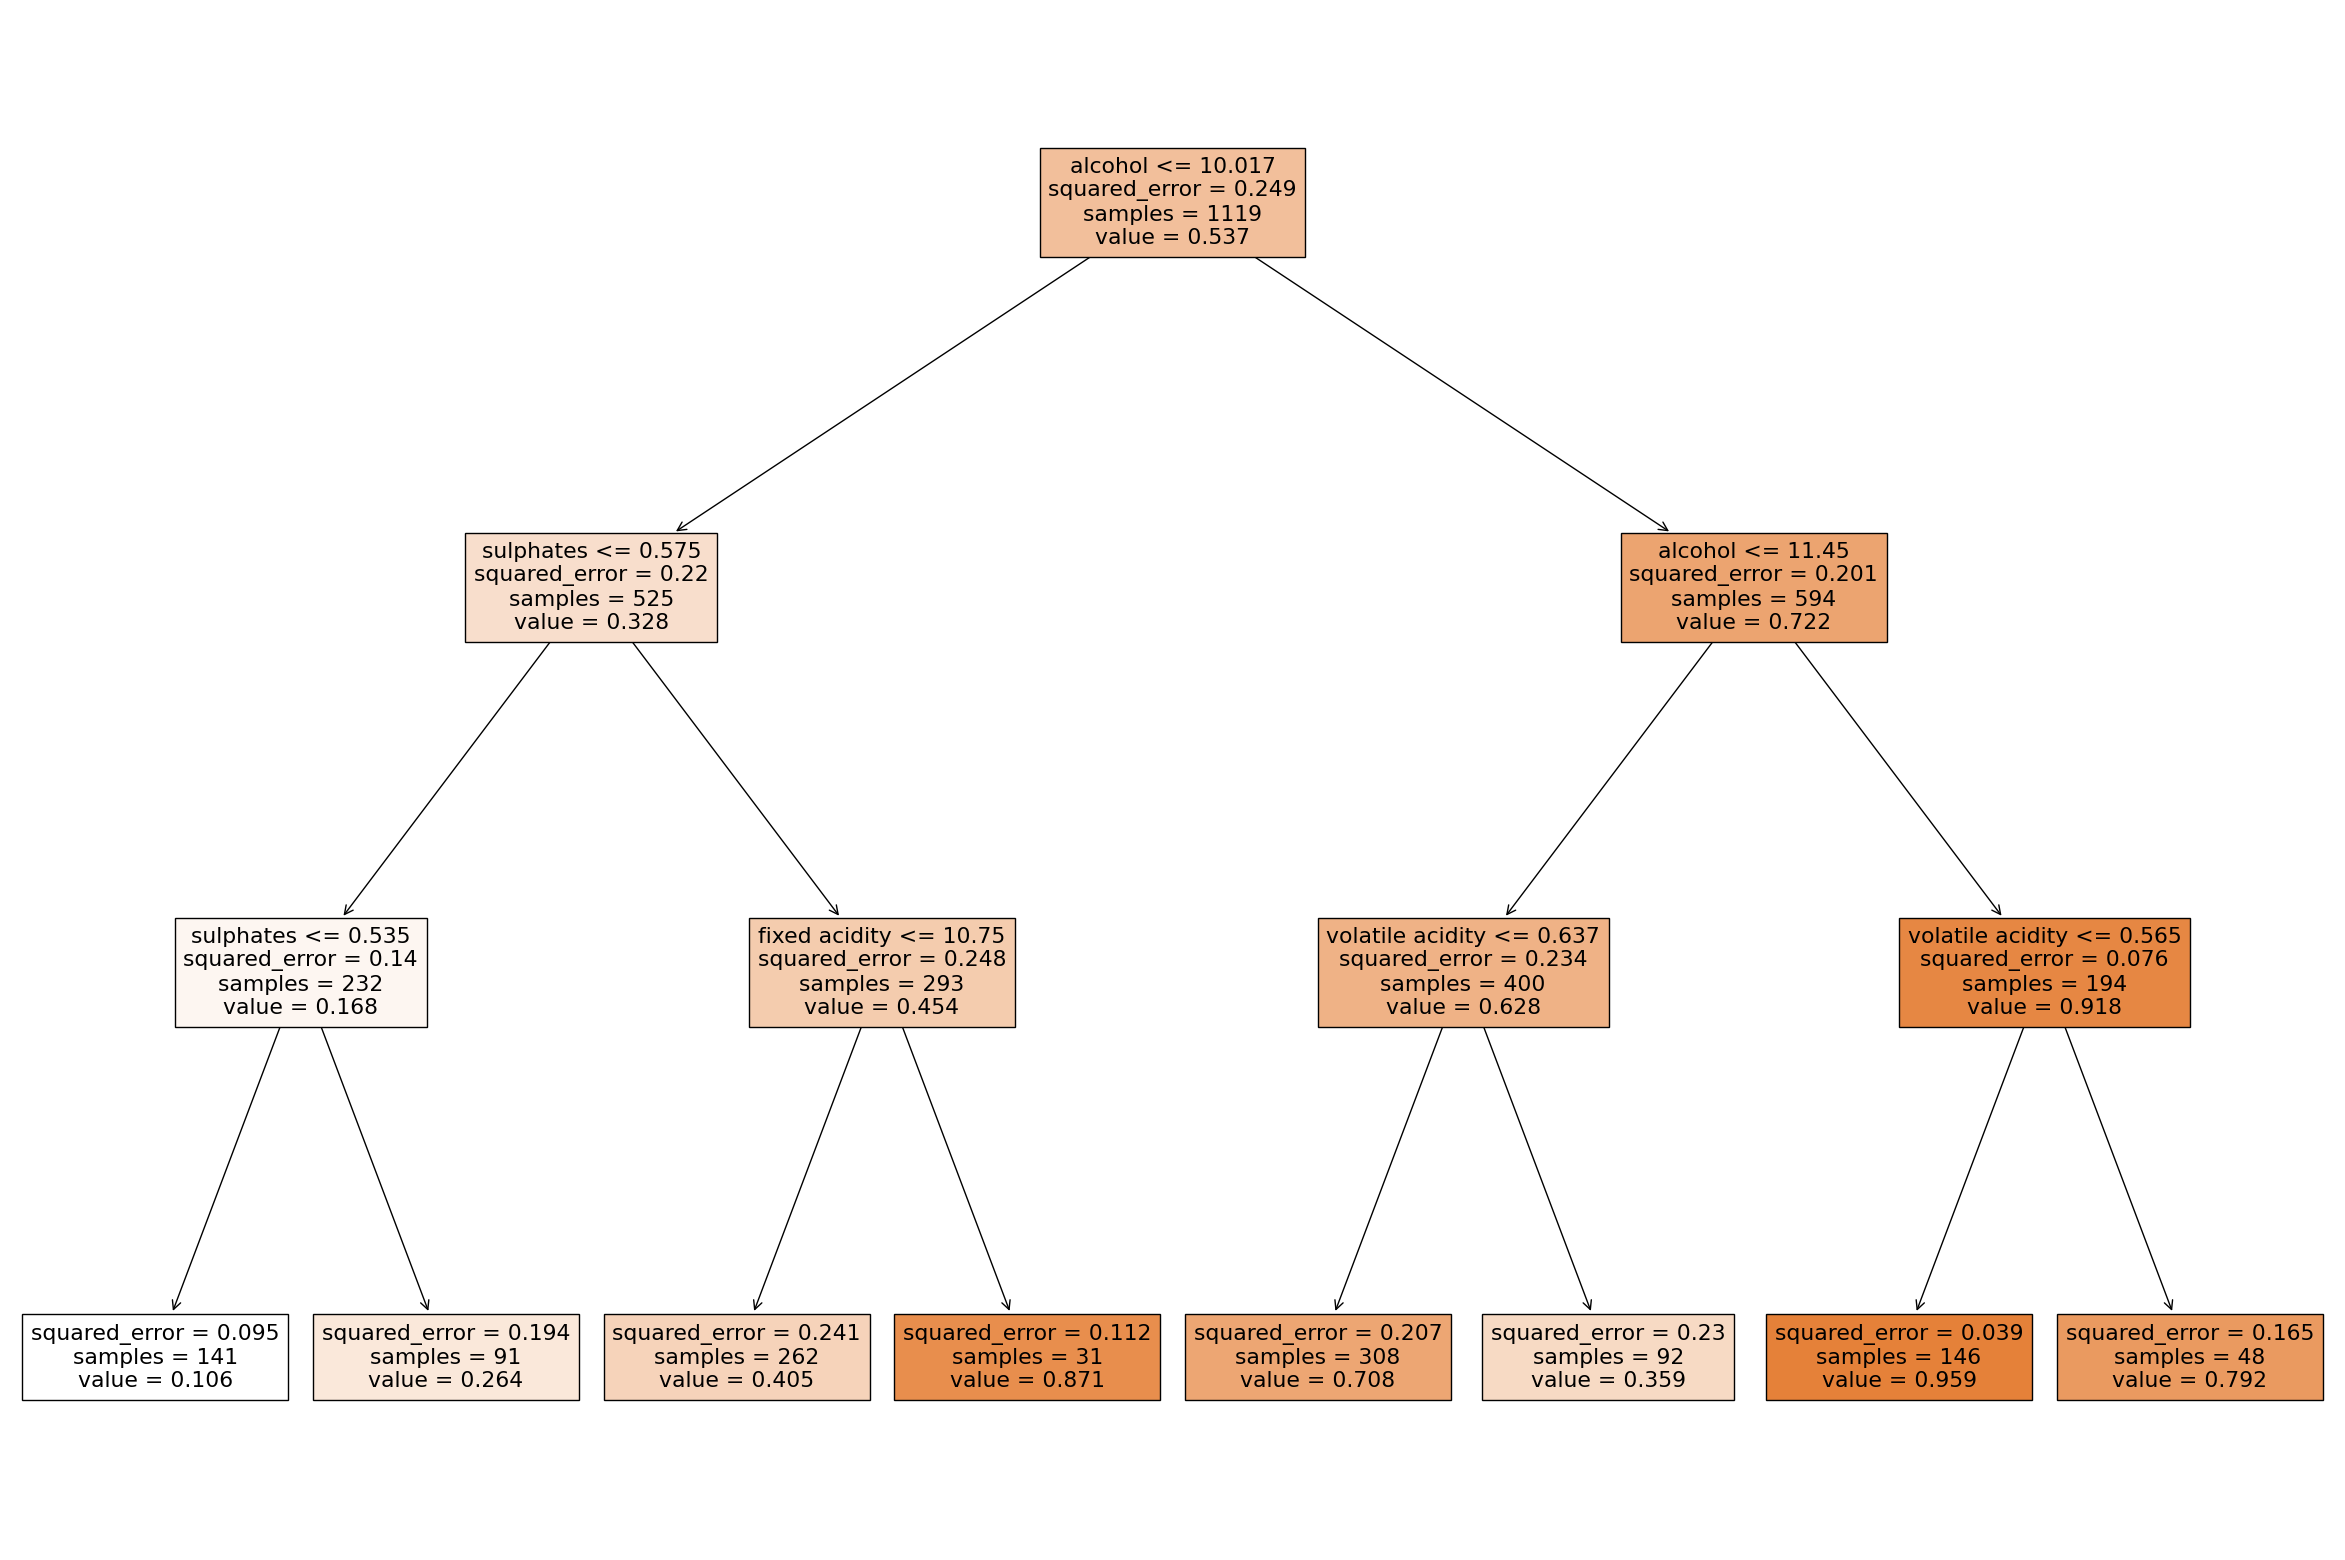

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model3,
               feature_names=list(predictors_train.columns),
               filled=True)

Step 35: Make predictions on testing data

In [ ]:
prediction_on_test = model3.predict(predictors_test)

Step 36: Examine the evaluation results on testing data: MAE and RMSE

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.3688552742380352
RMSE: 0.437975474100345


Step 37: Calcualte the r2 score.

In [ ]:
r2 = r2_score(target_test, prediction_on_test)
print("R^2 Score:", r2)

R^2 Score: 0.23009010406152142


Step 38: Experimenting with different depth 5 and 9 to create a more accurate tree.

MAE: 0.3493339568863117
RMSE: 0.45089817300093393


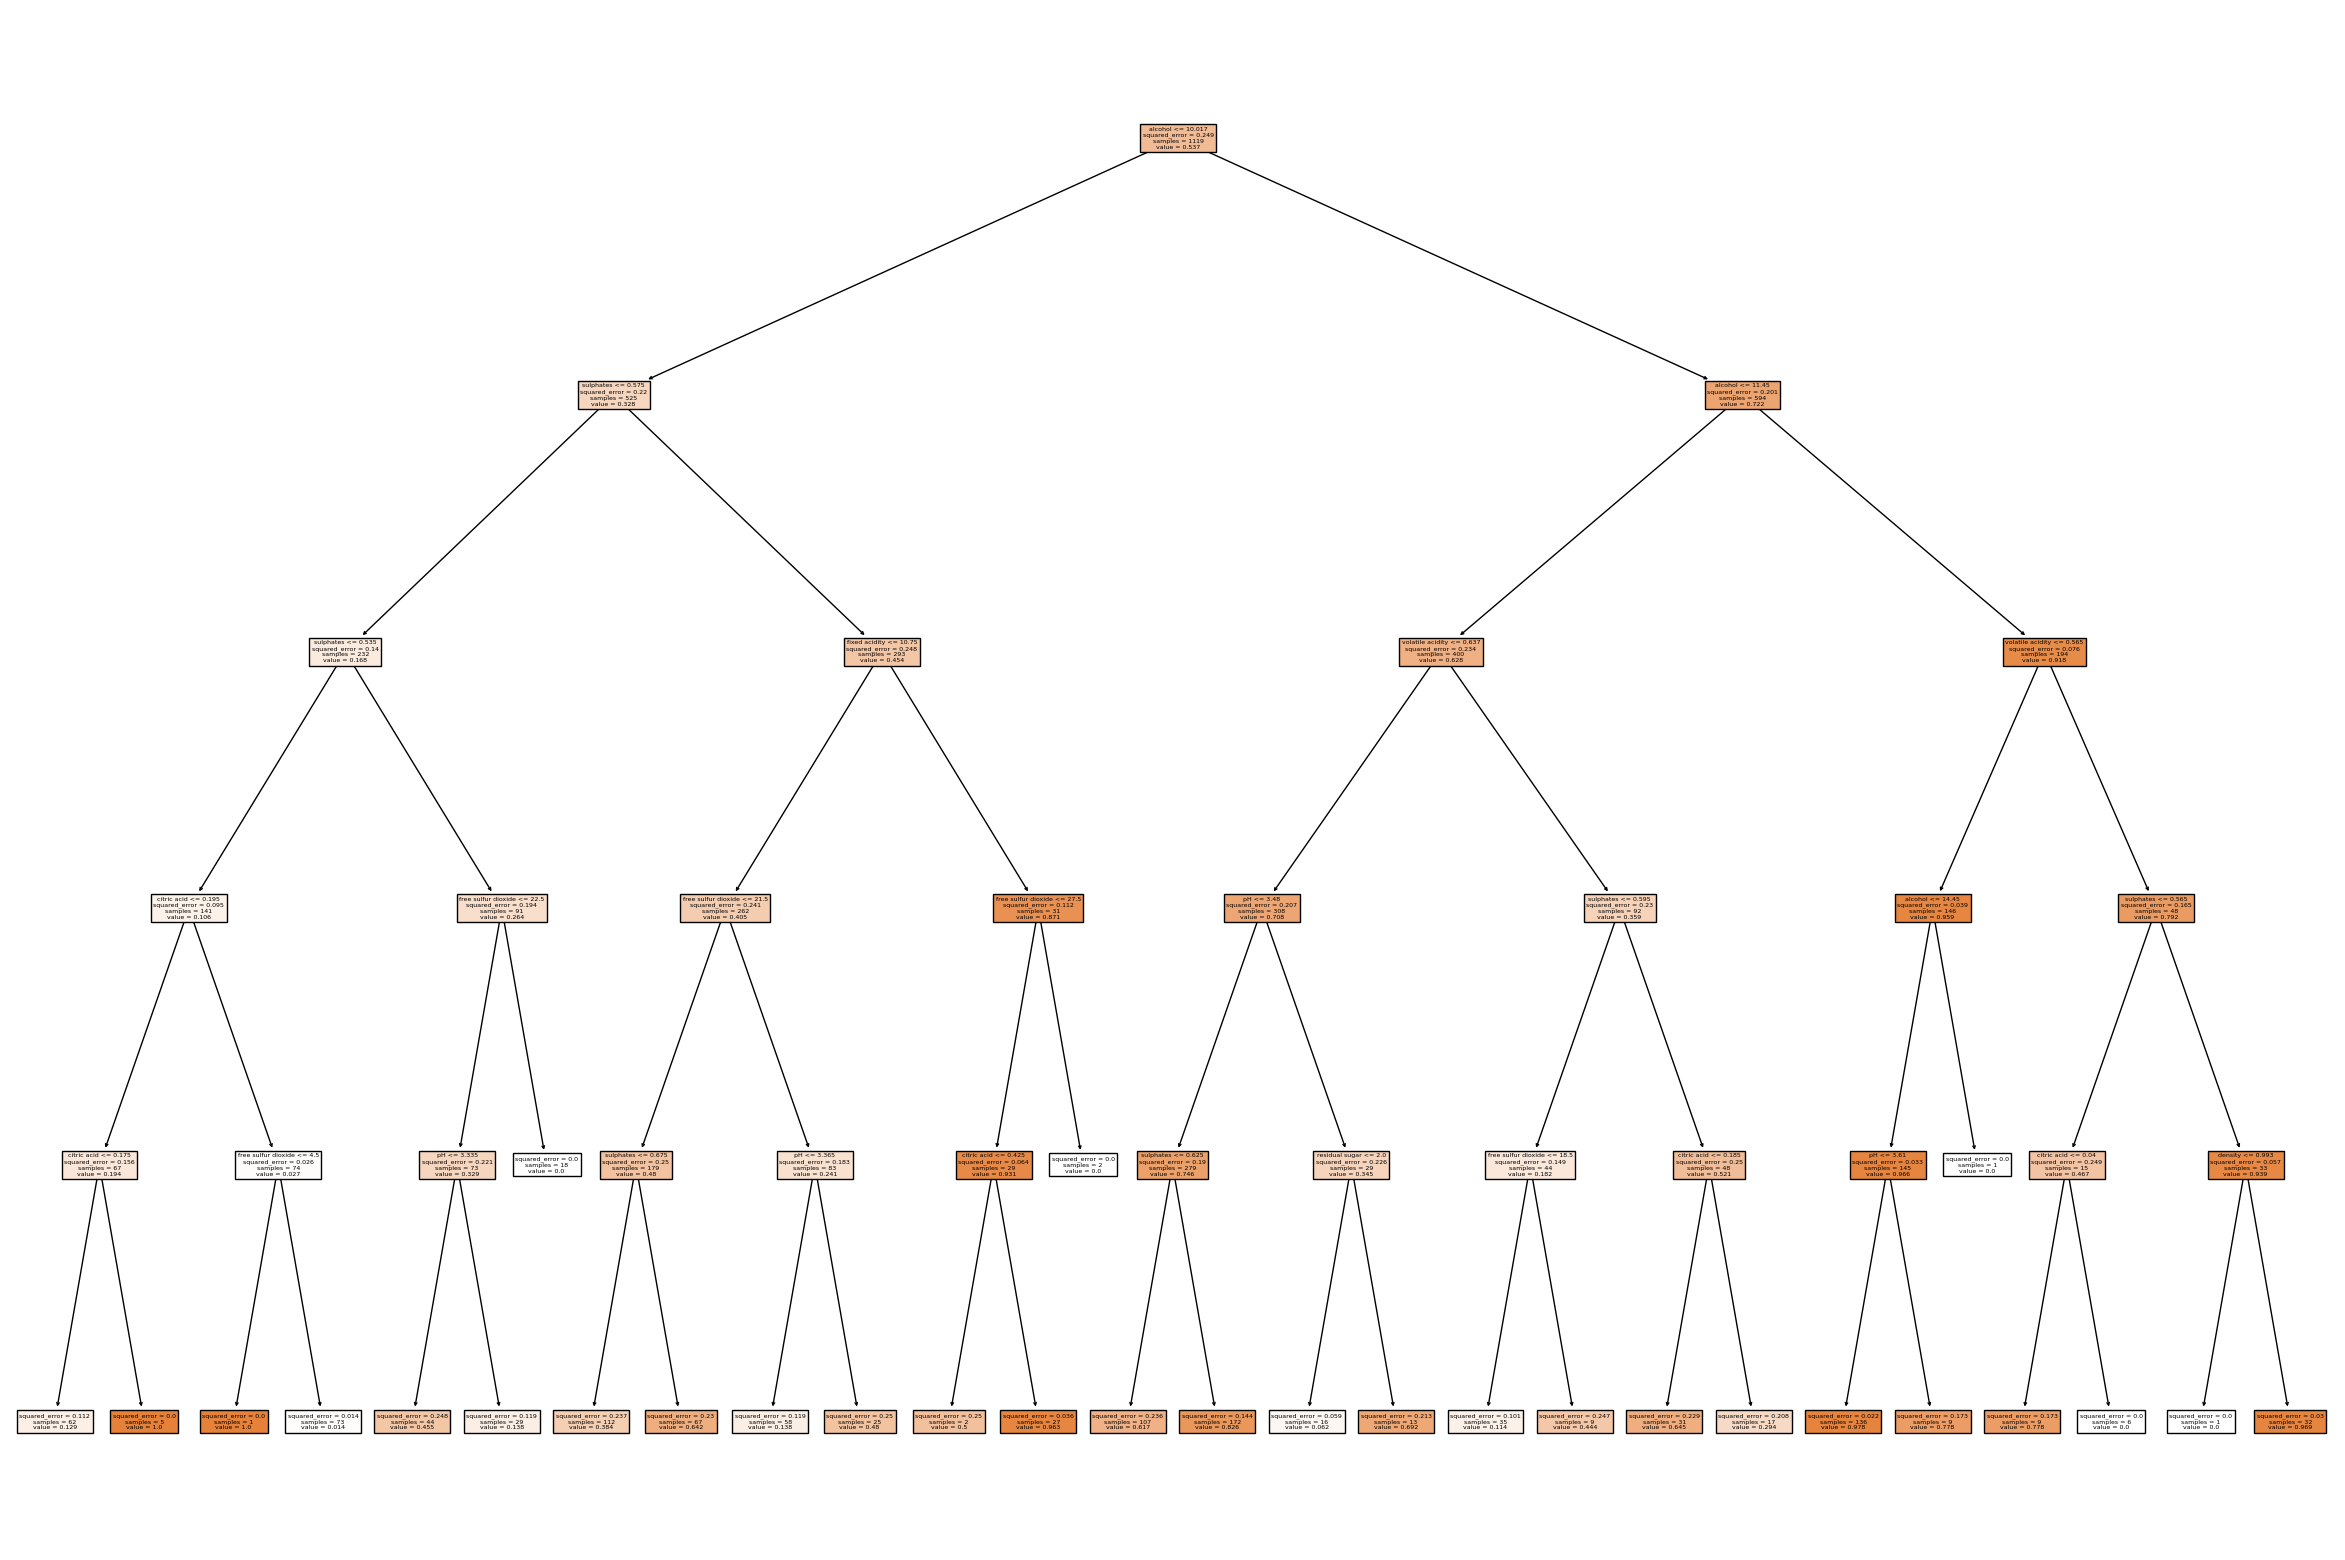

In [ ]:
model3 = DecisionTreeRegressor(random_state=0, max_depth=5)
model3.fit(predictors_train, target_train)

from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model3,
               feature_names=list(predictors_train.columns),
               filled=True)

prediction_on_test = model3.predict(predictors_test)

MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)


MAE: 0.28380699123294806
RMSE: 0.48689971692594886


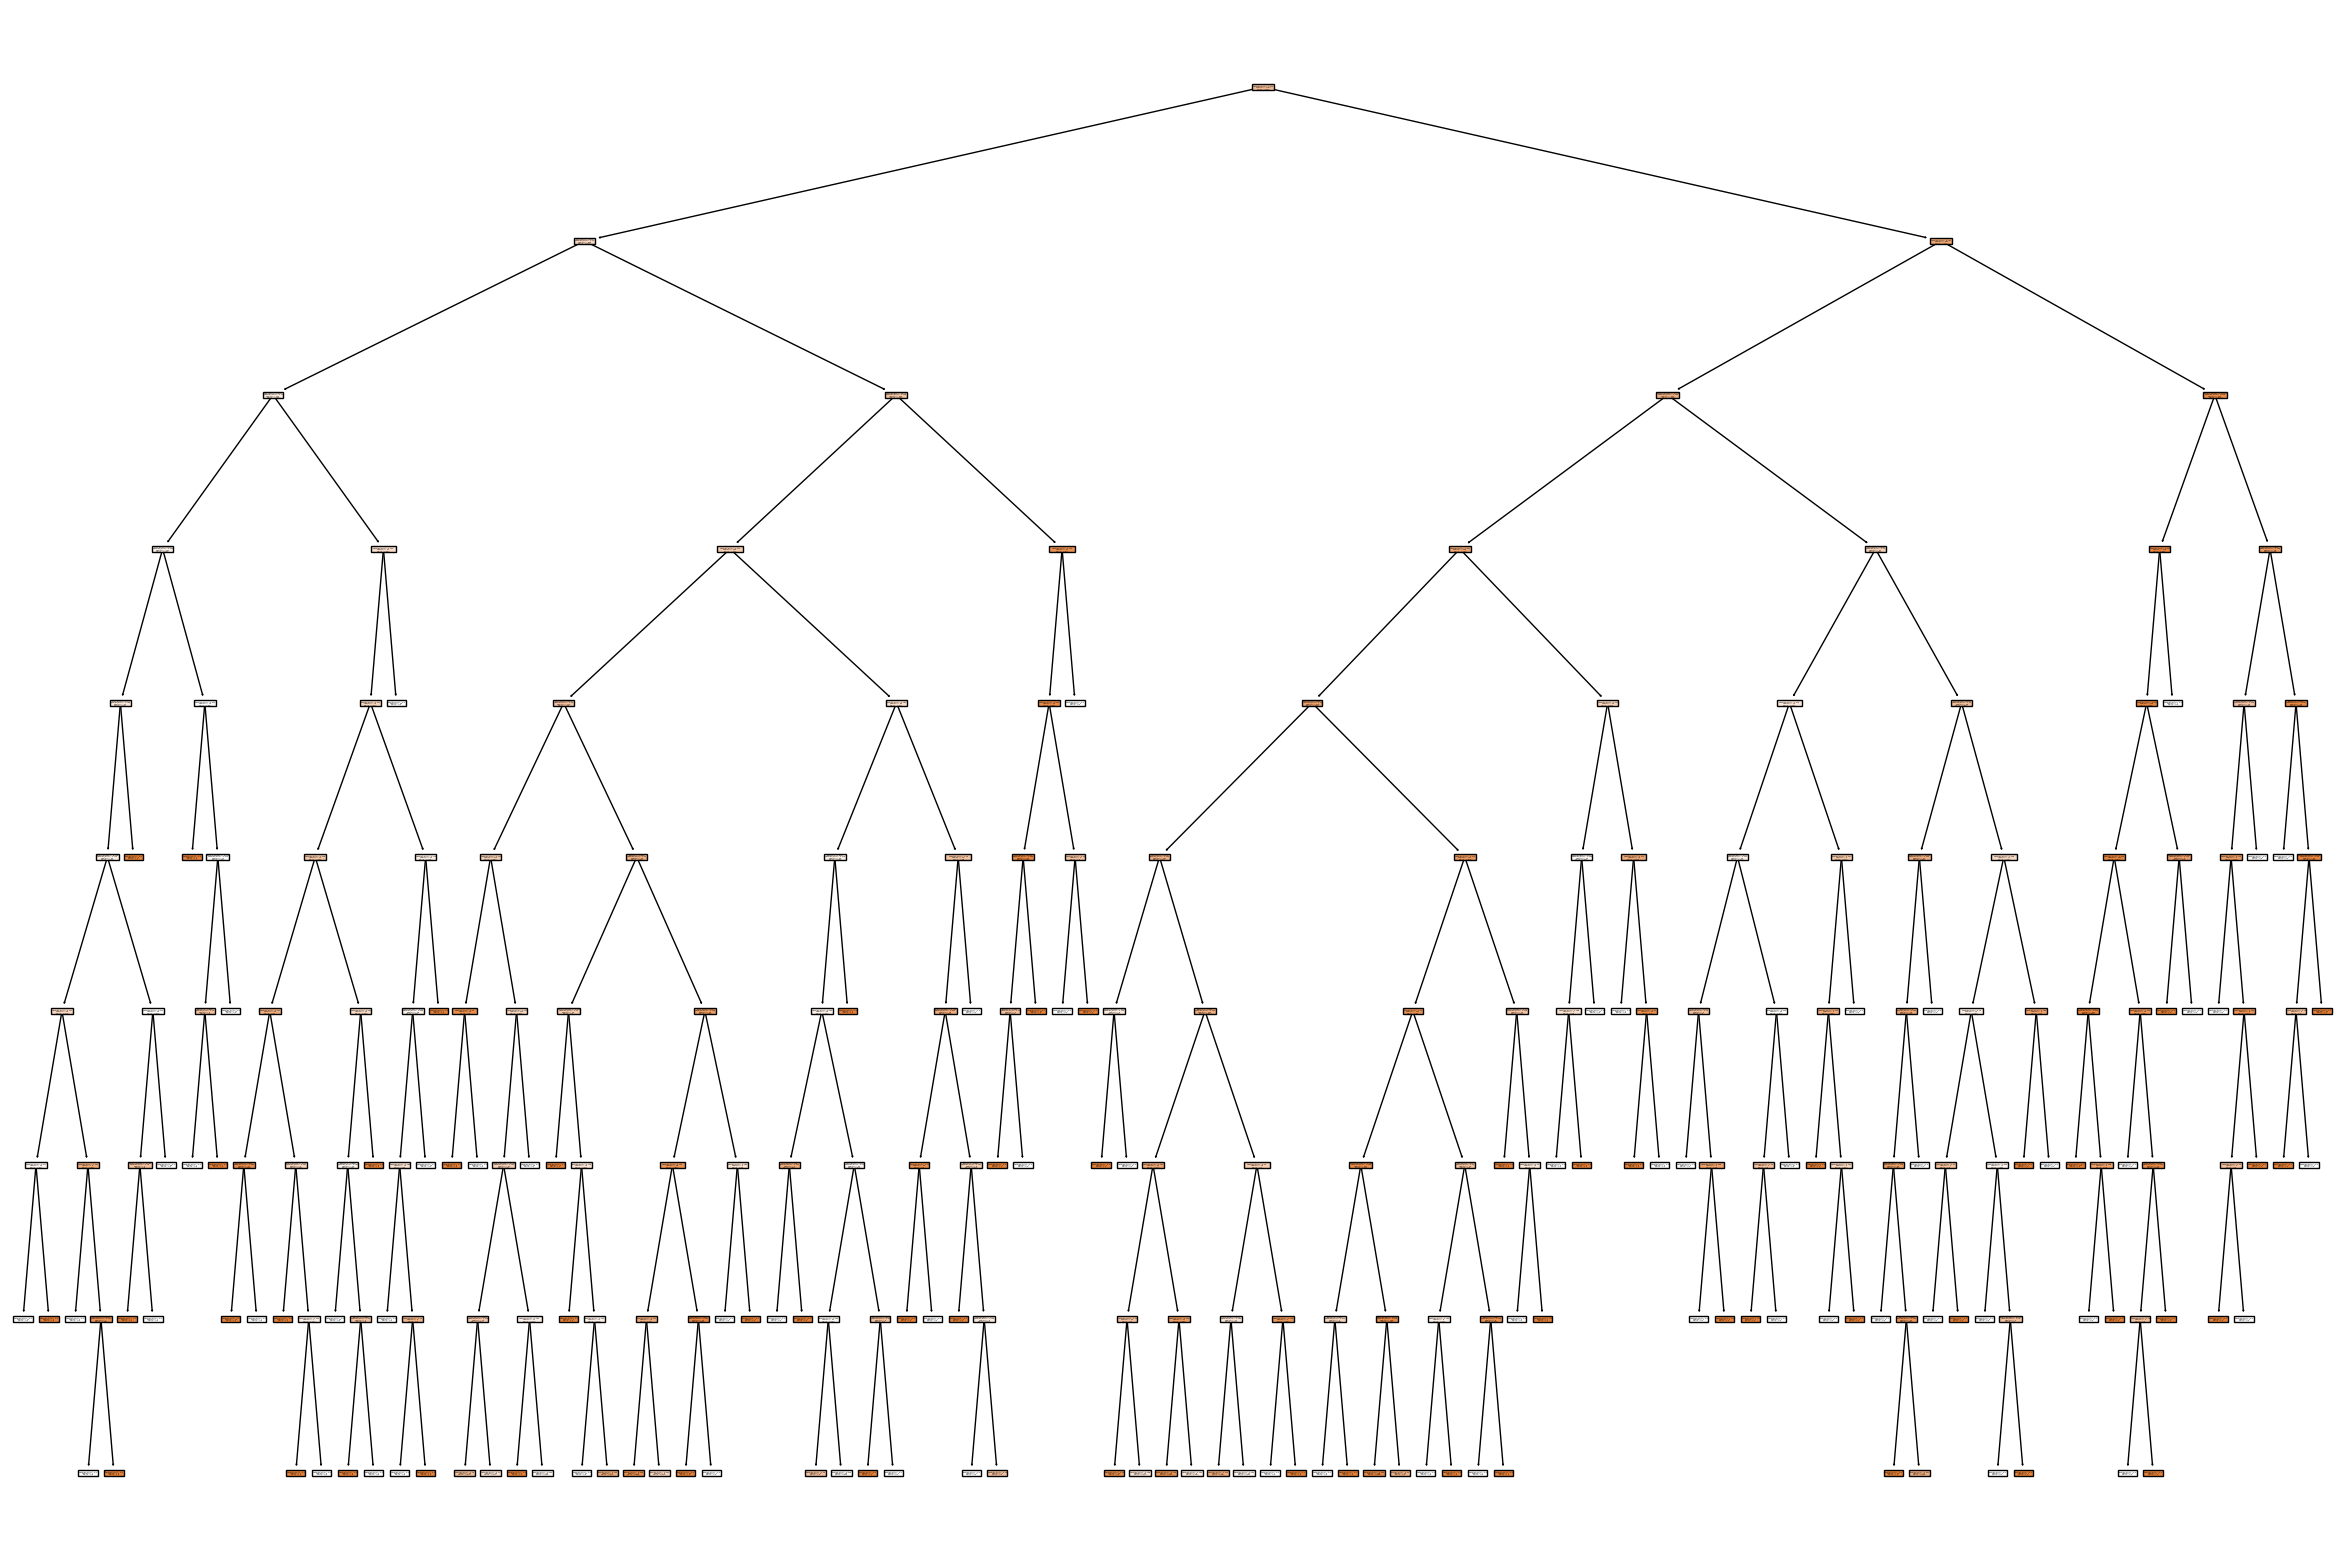

In [ ]:
model3 = DecisionTreeRegressor(random_state=0, max_depth=9)
model3.fit(predictors_train, target_train)

from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model3,
               feature_names=list(predictors_train.columns),
               filled=True)

prediction_on_test = model3.predict(predictors_test)

MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

**EXPERIMENTING REGRESSION TREE WITH DIFFERENT DEPTHS:**

In [ ]:
for i in range(1, 10):
  model3 = DecisionTreeRegressor(random_state=0, max_depth=i)
  model3.fit(predictors_train, target_train)
  prediction_on_test = model3.predict(predictors_test)
  MAE = mean_absolute_error(target_test, prediction_on_test)
  RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
  print("Max_depth:", i)
  print("MAE:", MAE)
  print("RMSE:", RMSE)

Max_depth: 1
MAE: 0.41304894179894175
RMSE: 0.45092729826378436
Max_depth: 2
MAE: 0.38560186716395156
RMSE: 0.441360332461365
Max_depth: 3
MAE: 0.3688552742380352
RMSE: 0.437975474100345
Max_depth: 4
MAE: 0.36795781559535234
RMSE: 0.4482879994615881
Max_depth: 5
MAE: 0.3493339568863117
RMSE: 0.45089817300093393
Max_depth: 6
MAE: 0.3446062264234742
RMSE: 0.46936907006453726
Max_depth: 7
MAE: 0.31412116924003536
RMSE: 0.46221541304447167
Max_depth: 8
MAE: 0.2947804696322583
RMSE: 0.47370528442591203
Max_depth: 9
MAE: 0.28380699123294806
RMSE: 0.48689971692594886


Based on the above regression tree results, the model with max_depth=9 has the lowest MAE and RMSE values, indicating better accuracy compared to the other models. Therefore, the decision tree model with max_depth=9 is more accurate.

**SVR MODEL:**

Step 39: Build a SVM model with default setting (C = 1.0)

In [ ]:
model4 = SVR(C=1.0)
model4.fit(predictors_train, target_train)

SVR()

Step 40: Make predictions on testing data.

In [ ]:
prediction_on_test = model4.predict(predictors_test)

Step 41: Examine the evaluation results on testing data: MAE and RMSE.

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.3773929029818799
RMSE: 0.4521364469640321


Step 42: Evaluating the different SVR models with C values 10 and 300.

In [ ]:
model4 = SVR(C=10)
model4.fit(predictors_train, target_train)

SVR(C=10)

In [ ]:
prediction_on_test = model4.predict(predictors_test)

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.3583532658396547
RMSE: 0.4389452368818969


In [ ]:
model4 = SVR(C=300.0)
model4.fit(predictors_train, target_train)

SVR(C=300.0)

In [ ]:
prediction_on_test = model4.predict(predictors_test)

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.34955782514282274
RMSE: 0.4391497107755084


**EVALUATING THE PERFORMANCE OF ABOVE SVR MODELS**

**SVR with C=300.0:**

MAE: 0.350
RMSE: 0.439
This SVR model with a high value of C (300.0) achieves a relatively low MAE and RMSE, indicating good predictive performance. A high value of C allows the model to fit the training data more closely, potentially resulting in better performance on the test data. The model captures the underlying patterns in the data well, resulting in accurate predictions.

**SVR with C=10:**

MAE: 0.358
RMSE: 0.439
This SVR model with a moderate value of C (10) also achieves a reasonable MAE and RMSE, comparable to the previous model. A lower value of C may lead to a smoother decision boundary, preventing overfitting. Despite the lower value of C compared to the first model, it still captures the data patterns effectively, resulting in accurate predictions.

**SVR with C=1.0:**

MAE: 0.377
RMSE: 0.452
This SVR model with a low value of C (1) shows a higher MAE and RMSE compared to the other models. A very low value of C may lead to underfitting, where the model fails to capture the complexity of the data adequately. As a result, the predictions may be less accurate, leading to higher errors.

**MLP MODEL:**

Step 43:Build MLP model contains two hidden layers: 4 hidden nodes for the first layer, and 2 hidden nodes for the second layer, 2 hidden nodes for the third layer. Set random_state=1.

In [ ]:
model5 = MLPRegressor(hidden_layer_sizes=(4,2,2), random_state=1)
model5.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(4, 2, 2), random_state=1)

Step 44: Make predictions on testing data.

In [ ]:
prediction_on_test = model5.predict(predictors_test)

Step 45: Examine the evaluation results on testing data: MAE and RMSE.

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.39488296605322193
RMSE: 0.432399954789023


Step 46: Evaluating MLP models with different hidden layers (24,12,2) and (64,16,4)

In [ ]:
model5 = MLPRegressor(hidden_layer_sizes=(24,12,2), random_state=1)
model5.fit(predictors_train, target_train)

MLPRegressor(hidden_layer_sizes=(24, 12, 2), random_state=1)

In [ ]:
prediction_on_test = model5.predict(predictors_test)

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.3888242874067307
RMSE: 0.43818356469326436


In [ ]:
model5 = MLPRegressor(hidden_layer_sizes=(64,16,4), random_state=1)
model5.fit(predictors_train, target_train)

MLPRegressor(hidden_layer_sizes=(64, 16, 4), random_state=1)

In [ ]:
prediction_on_test = model5.predict(predictors_test)

In [ ]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.3776313877360191
RMSE: 0.4345203357989196


**EVALUATING THE  PERFORMANCE OF THE ABOVE MLP MODELS**

**MLPRegressor with hidden layer sizes (4, 2, 2):**

MAE: 0.395
RMSE: 0.432
This model has moderate MAE and RMSE values. The architecture (4, 2, 2) suggests a relatively simple neural network structure with a shallow network and fewer neurons in each layer. The performance is reasonable but may indicate that the model could benefit from additional complexity or tuning to improve predictive accuracy.

**MLPRegressor with hidden layer sizes (24, 12, 2):**

MAE: 0.389
RMSE: 0.438
This model has similar MAE and slightly higher RMSE compared to the first model. The architecture (24, 12, 2) indicates a deeper network with more neurons in each layer compared to the previous model. Despite the additional complexity, the performance is comparable, suggesting that the additional neurons may not have significantly improved predictive accuracy.

**MLPRegressor with hidden layer sizes (64, 16, 4):**

MAE: 0.378
RMSE: 0.435
This model has the lowest MAE and comparable RMSE among the three models. The architecture (64, 16, 4) suggests a deeper and wider network compared to the previous models. The lower MAE and RMSE values indicate better predictive performance, suggesting that the additional complexity in the network structure has resulted in improved accuracy.

STEP 47:creating a single multi-class bar chart that encompasses the MAE and RMSE for all models.

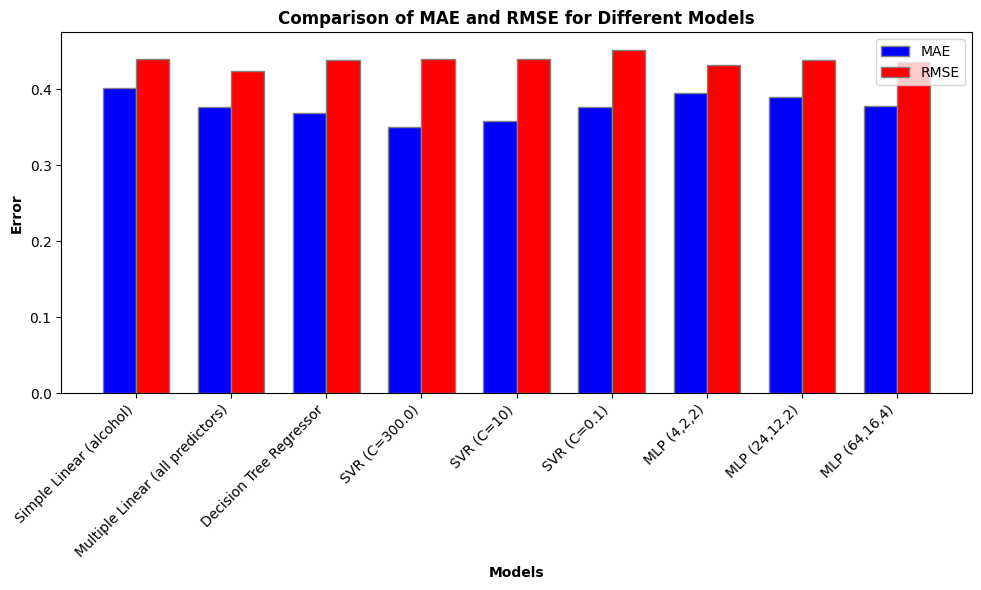

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Simple Linear (alcohol)', 'Multiple Linear (all predictors)', 'Decision Tree Regressor', 'SVR (C=300.0)', 'SVR (C=10)', 'SVR (C=0.1)', 'MLP (4,2,2)', 'MLP (24,12,2)','MLP (64,16,4)']

mae_values = [0.402, 0.376, 0.369, 0.350, 0.358, 0.377, 0.395, 0.389, 0.378]

rmse_values = [0.439, 0.424, 0.438, 0.439, 0.439, 0.452, 0.432, 0.438, 0.435]

bar_width = 0.35

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, mae_values, color='b', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, rmse_values, color='r', width=bar_width, edgecolor='grey', label='RMSE')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45, ha='right')
plt.ylabel('Error', fontweight='bold')
plt.title('Comparison of MAE and RMSE for Different Models', fontweight='bold')

plt.legend()

plt.tight_layout()
plt.show()


**MODELS COMPARISON BASED ON MAE AND RMSE VALUES:**

**Simple Linear Regression (alcohol):** This model uses only the 'alcohol' predictor for regression.It has relatively higher MAE and RMSE compared to other models, indicating less accurate predictions.The simplicity of using only one predictor might lead to underfitting, resulting in lower predictive performance.

**Multiple Linear Regression (all predictors):**This model uses all available predictors for regression. It performs slightly better than the model using only 'alcohol', with lower MAE and RMSE.Using more predictors allows the model to capture more complex relationships in the data, potentially leading to better predictions.

**Decision Tree Regressor(max_depth=3):**This model is a decision tree regressor with a maximum depth of 3.It has moderate MAE and RMSE values.Decision trees are prone to overfitting if the maximum depth is too large, but limiting the depth helps control overfitting. However, this may result in underfitting.

**SVR (C=300.0), SVR (C=10), SVR (C=1.0):**These models are Support Vector Regressors with different values of the regularization parameter C.
The SVR with C=300.0 and C=10 perform relatively better with lower MAE and RMSE compared to C=1.Higher values of C lead to less regularization, allowing the model to fit the training data more closely. However, this may lead to overfitting if not properly controlled.The model with C=1 performs the worst among SVR models, indicating that too much regularization can lead to underfitting and poor predictive performance.

**MLP (4,2,2), MLP (24,12,2), MLP(64,16,4):**These models are Multi-Layer Perceptron regressors with different hidden layer architectures.All models have moderate MAE and RMSE values.In this case, both architectures perform similarly, indicating that the model may not be very sensitive to changes in the architecture.

**BEST SUITABLE MODEL:**

Based on the above RMSE and MAE values, the **SVR model with C=300.0** seems to be the most suitable for predicting wine quality. It achieves relatively low MAE and RMSE values, indicating better predictive accuracy compared to other models. Additionally, SVR is known for its flexibility in capturing complex relationships in the data, which might be beneficial for predicting wine quality accurately. However, it's essential to fine-tune hyperparameters carefully to avoid overfitting.

**CLASSIFICATION MODELS IMPLEMENTATION:**

**MLP CLASSIFIER:**

Step 48:Build MLP model contains three hidden layers: 64 hidden nodes for the first layer, 16 hidden nodes for the second layer, and 8 hidden nodes for the third layer. Set random state 1.Make predictions on testing data.Examine the evaluation results on testing data: confusion_matrix and classification report.

In [ ]:
model_MLP = MLPClassifier(hidden_layer_sizes=(96,16,2), random_state=1)
model_MLP.fit(predictors_train, target_train)

MLPClassifier(hidden_layer_sizes=(96, 16, 2), random_state=1)

In [ ]:
prediction_on_test = model_MLP.predict(predictors_test)

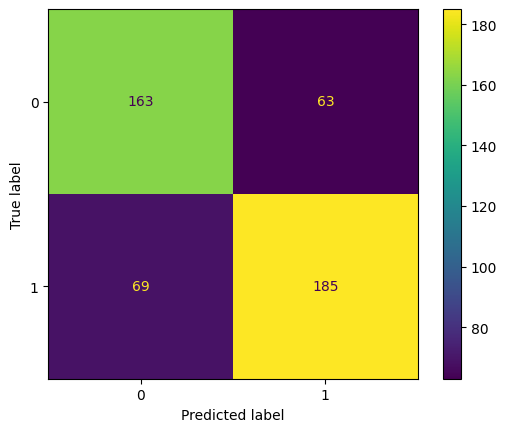

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_MLP.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       226
           1       0.75      0.73      0.74       254

    accuracy                           0.73       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.73      0.72      0.73       480



**DECISION TREE CLASSIFIER:**

Step 49: Build a for Decision Tree model on training data with max_depth = 34.Plot the tree.Make predictions on testing data.Examine the evaluation results on testing data: confusion_matrix and classification report.

In [ ]:
model_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 34)
model_tree.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=34, random_state=1)

[Text(0.5088164427570093, 0.975, 'alcohol <= 10.525\nentropy = 0.996\nsamples = 1119\nvalue = [518, 601]\nclass = Yes'),
 Text(0.221001265576324, 0.925, 'sulphates <= 0.535\nentropy = 0.96\nsamples = 690\nvalue = [426, 264]\nclass = No'),
 Text(0.08411214953271028, 0.875, 'volatile acidity <= 0.595\nentropy = 0.559\nsamples = 161\nvalue = [140, 21]\nclass = No'),
 Text(0.040498442367601244, 0.825, 'sulphates <= 0.475\nentropy = 0.767\nsamples = 67\nvalue = [52, 15]\nclass = No'),
 Text(0.03426791277258567, 0.775, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = No'),
 Text(0.04672897196261682, 0.775, 'alcohol <= 9.65\nentropy = 0.889\nsamples = 49\nvalue = [34, 15]\nclass = No'),
 Text(0.018691588785046728, 0.725, 'pH <= 3.26\nentropy = 0.579\nsamples = 29\nvalue = [25, 4]\nclass = No'),
 Text(0.012461059190031152, 0.675, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = No'),
 Text(0.024922118380062305, 0.675, 'citric acid <= 0.2\nentropy = 0.811\nsamples = 16\nvalue = [12,

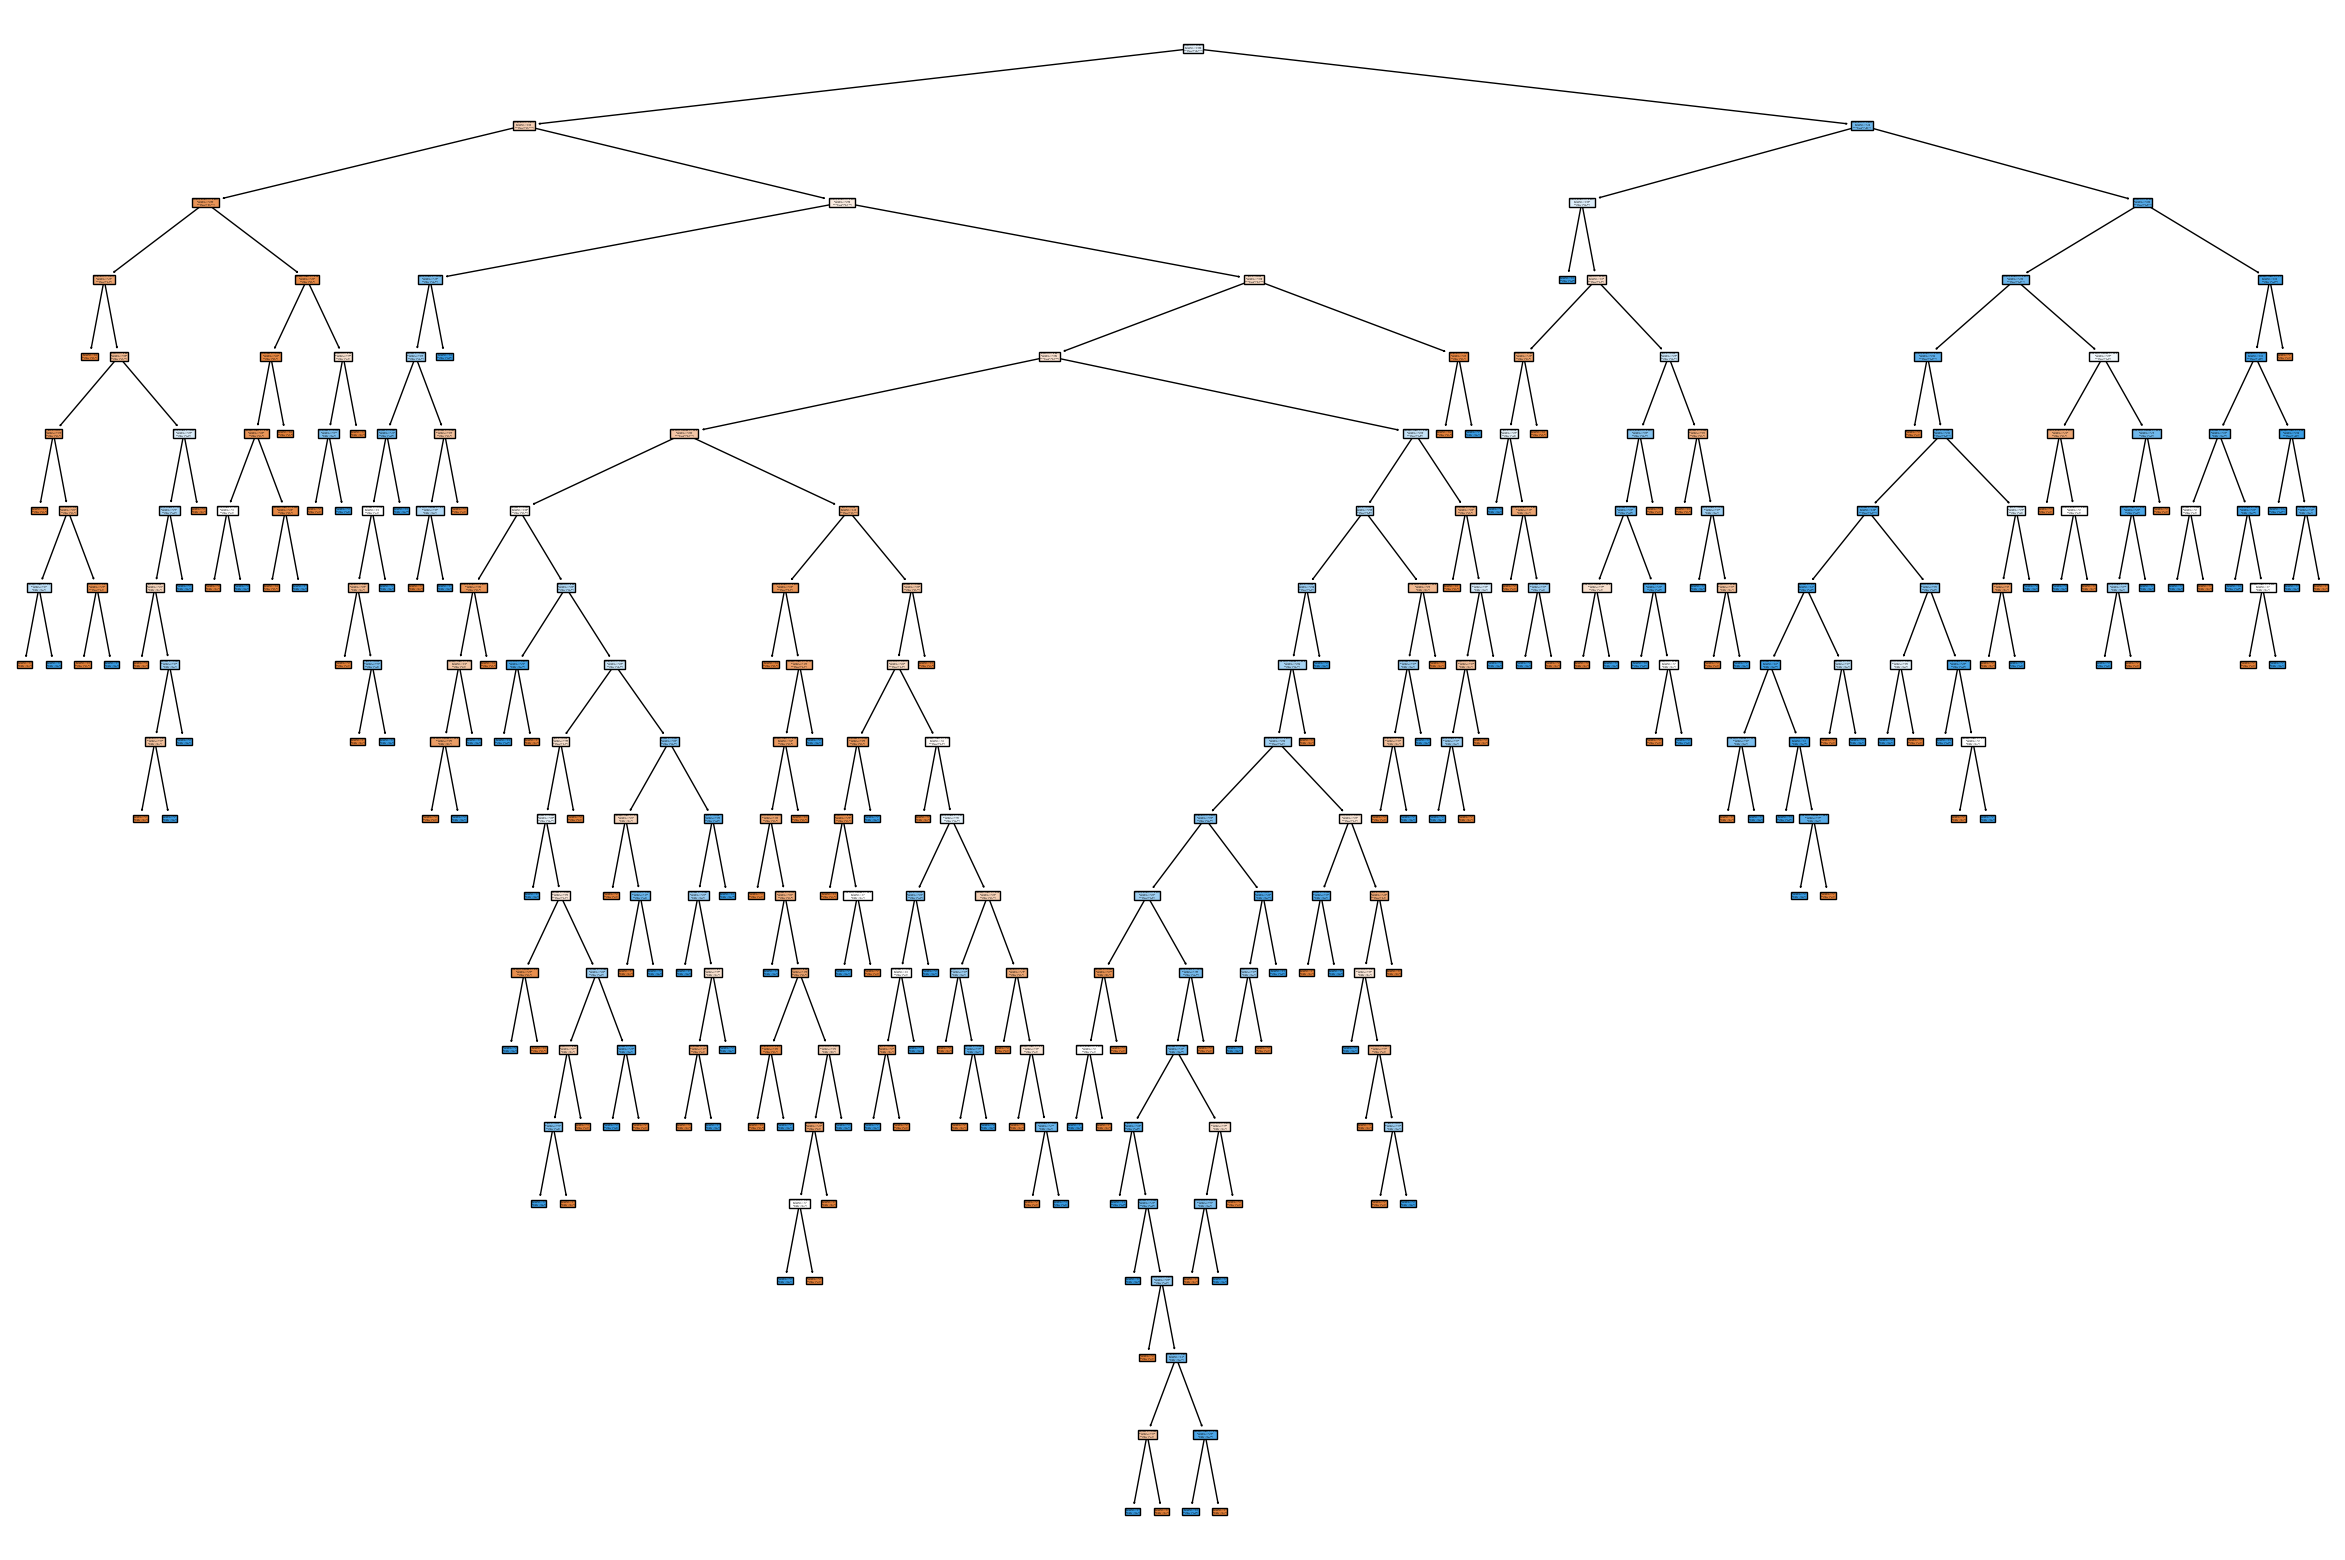

In [ ]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_tree,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
prediction_on_test = model_tree.predict(predictors_test)

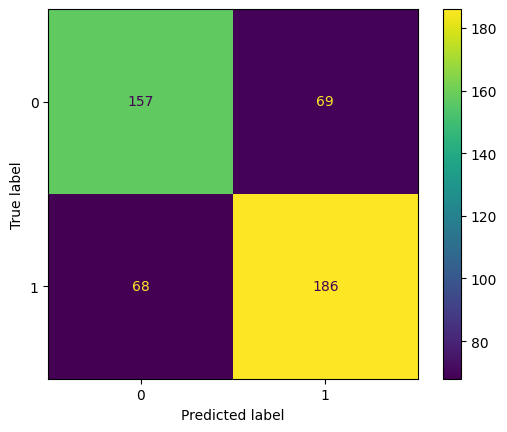

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tree.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       226
           1       0.73      0.73      0.73       254

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



**KNN CLASSIFIER:**

Step 50: Build a K Nearest Neighbor model on training data with n_neighbors = 3.Make predictions on testing data.Examine the evaluation results on testing data: confusion_matrix and classification report.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction_on_test = model_knn.predict(predictors_test)

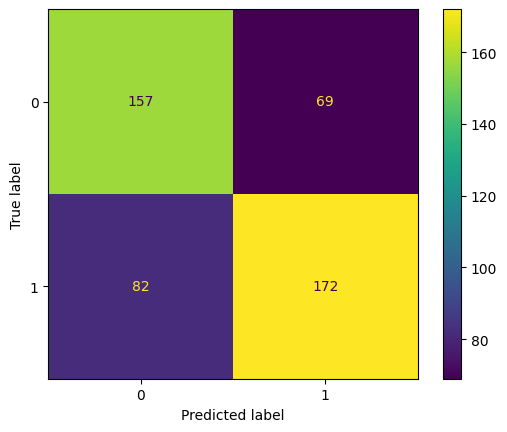

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       226
           1       0.71      0.68      0.69       254

    accuracy                           0.69       480
   macro avg       0.69      0.69      0.69       480
weighted avg       0.69      0.69      0.69       480



**ADVANTAGES OF USING CLASSIFICATION MODELS FOR WINE QUALITY PREDICTION:**

**Interpretability:** Classification models provide clear and interpretable results. They classify wines into discrete categories making it easy to understand and communicate the predictions.

**Simplicity:** Classification models are relatively simple to implement and understand compared to regression models. They involve straightforward algorithms such as logistic regression, decision trees, or k nearest neighbours

**Clear Decision Making:** Classification models provide clear decision boundaries between different quality categories. Winemakers can use these boundaries to make decisions about the quality of their wines and take appropriate actions.

**Handling Imbalanced Data**: Classification algorithms have techniques to handle imbalanced data, where one class may have significantly fewer samples than others. This is common in wine quality datasets where there may be fewer samples in extreme quality categories.

**DISADVANTAGES OF USING CLASSIFICATION MODELS FOR WINE QUALITY PREDICTION:**

**Loss of Information:** Classifying wine quality into discrete categories may result in loss of information compared to regression models. Regression models provide continuous predictions, allowing for a more nuanced understanding of the relationship between predictors and wine quality.

**Limited Predictive Power**: Classification models may not capture the full range of variability in wine quality. They categorize wines into predefined classes, which may not fully represent the complexity of wine quality variation.

**Subjectivity in Class Definition**: Defining quality categories for classification can be subjective and may vary depending on the dataset and the criteria used. Different experts may have different opinions on what constitutes low, medium, or high-quality wine.

**Difficulty in Handling Ordinal Data:** Wine quality ratings are often ordinal in nature, with categories like 'low', 'medium', and 'high'. Treating ordinal data as categorical may not fully capture the underlying order and may result in loss of information.

**BEST CLASSIFICATION MODEL:**

 Among the above three classification models Decision Tree, MLP Classifier and K Nearest Neighbour, the **MLP classifier with architecture (96,16,2)** performs the best. It achieves the highest accuracy of **73%** and relatively balanced precision and recall scores for both classes when compared to **Decission tree (accuracy = 71%)** and **KNN model (accuracy = 69%).**

**COMPARISON OF CLASSIFICATION MODELS WITH REGRESSION MODELS:**

Considering the performance metrics and the nature of the problem, I prefer the **regression approach** for predicting wine quality. Regression models provide continuous predictions, allowing for a more nuanced understanding of wine quality. Additionally, SVR with appropriate hyperparameters achieves better predictive accuracy compared to the classification models in this case.

However, the choice between classification and regression will depend on various factors such as the nature of the dataset, the goals of the analysis, and the interpretability of the results in some cases.

**CONCLUSION:**

Overall, wine quality prediction using regression models requires careful consideration of model selection, feature engineering, hyperparameter tuning, and evaluation metrics. While no model may be perfect, leveraging insights from different models can help improve overall predictive accuracy and understanding of the factors influencing wine quality.



**FOLLOWING THE STEPS ON ANOTHER DATASET CAR PRICE FROM KAGGLE:**

**CAR PRICE PREDICTION**:

This dataset contains various features related to cars, including the year of manufacture, selling price, kilometers driven, fuel type, seller type, transmission type, number of previous owners, mileage, and engine specifications. These attributes provide valuable insights into the factors influencing car prices and can be used to develop predictive models for estimating the selling price of cars.

**VARIABLES DESCRIPTION:**

name: The name or model of the car.

year: The manufacturing year of the car.

selling_price: The price at which the car is being sold.

km_driven: The total distance (in kilometers) the car has been driven.

fuel: The type of fuel used by the car (e.g., petrol, diesel, CNG).

seller_type: The type of seller (e.g., individual, dealer).

transmission: The type of transmission (e.g., manual, automatic).

owner: The number of previous owners the car has had.

mileage(km/ltr/kg): The mileage of the car, indicating the distance it can travel per unit of fuel consumed, typically measured in kilometers per liter (km/l) for petrol and diesel cars, and kilometers per kilogram (km/kg) for CNG cars.

engine: The engine displacement or size, measured in cubic centimeters (cc).

max_power: The maximum power output of the engine, typically measured in brake horsepower (bhp) or kilowatts (kW).

seats: The number of seats in the car, including the driver's seat.

In [ ]:
car = pd.read_csv("/content/drive/MyDrive/IS670_data/cardekho.csv")
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


**DATA PREPROCESSING AND CLEANING**

In [ ]:
car.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [ ]:
car.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [ ]:
car.drop(columns=['mileage(km/ltr/kg)'],inplace=True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,88.2,5.0


In [ ]:
car.drop(columns=['engine'],inplace=True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.2,5.0


In [ ]:
car.drop(columns=['max_power'],inplace=True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0


In [ ]:
car.dropna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0
...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 571.6+ KB


In [ ]:
target = car['selling_price']
print(target.value_counts(normalize=True))

selling_price
300000     0.027928
600000     0.026206
350000     0.025714
550000     0.025098
450000     0.023991
             ...   
308000     0.000123
3900000    0.000123
2850000    0.000123
39000      0.000123
746000     0.000123
Name: proportion, Length: 677, dtype: float64


In [ ]:
X = car.drop('selling_price', axis=1)
y = car['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6502, 8) (1626, 8) (6502,) (1626,)


**VISUALIZATION OF DATA**

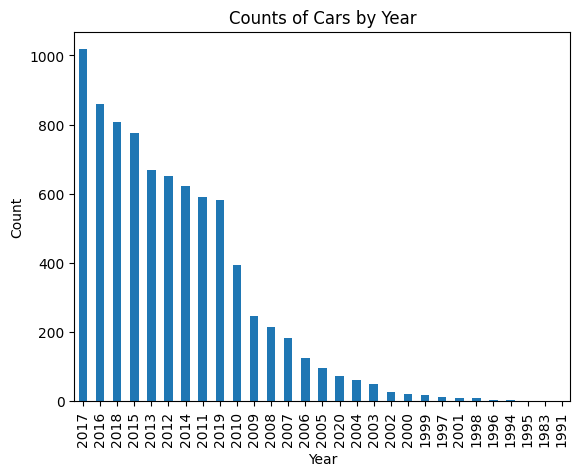

In [ ]:
car['year'].value_counts().plot(kind='bar')
plt.title('Counts of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

2017 recorded the highest count of cars 1100 and least count of 10 in 1994.

<ipython-input-88-2f38162e77b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(car['selling_price'])


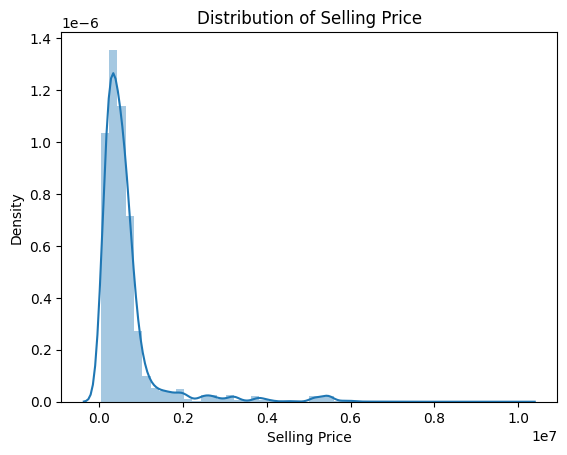

In [ ]:
sb.distplot(car['selling_price'])
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()

From the graph, the selling price of the cars was maximum within the range 0 to 0.2. The density was recorded 1.28.

<ipython-input-89-223591dc689a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(car['year'])


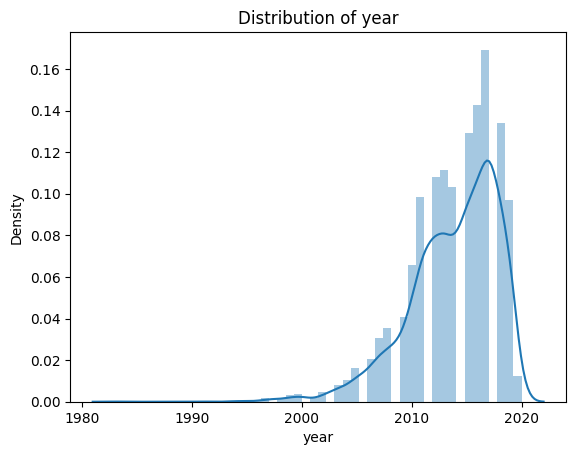

In [ ]:
sb.distplot(car['year'])
plt.title('Distribution of year')
plt.xlabel('year')
plt.ylabel('Density')
plt.show()

From the graph, density of cars started upsurging after the year 2000 and reached to the highest in the year 2018.

<Axes: ylabel='km_driven'>

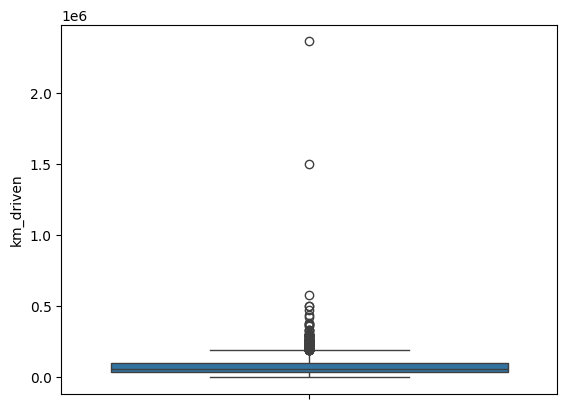

In [ ]:
sb.boxplot(car['km_driven'])

km_driven is identified as the outlier after the value 0.25.

**OUTLIER DETECTION AND REMOVAL**

In [ ]:
Q1 = car['km_driven'].quantile(0.25)
Q3 = car['km_driven'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q3 -  1.5 *IQR

outliers = car[car['km_driven'] > upper_limit]
outliers2 = car[car['km_driven'] < lower_limit]

print("Outliers in 'km_driven' column:")
print(outliers)
print(outliers2)

Outliers in 'km_driven' column:
                                      name  year  selling_price  km_driven  \
272                 Maruti Swift Dzire ZDi  2012         320000     193000   
287         Mahindra Bolero DI DX 7 Seater  2007         210000     207890   
394   Toyota Innova 2.5 G1 Diesel 8-seater  2005         250000     240000   
396         Hyundai Verna XXi ABS (Petrol)  2009         340000     214000   
397                  Hyundai Verna CRDi SX  2009         340000     214000   
...                                    ...   ...            ...        ...   
8031      Chevrolet Enjoy TCDi LT 7 Seater  2014         275000     195000   
8033                  Hyundai Verna 1.6 SX  2012         450000     200000   
8071   Toyota Innova 2.5 V Diesel 7-seater  2010         425000     200000   
8077             Toyota Innova 2.5 E 7 STR  2009         550000     250000   
8095             Ford Figo Diesel Titanium  2012         260000     194000   

        fuel seller_type transm

In [ ]:
removeupper = car.copy()
removelower = car.copy()
removeupper['km_driven'] = np.where(
    removeupper['km_driven'] > upper_limit,
    upper_limit,
    np.where(
         removelower['km_driven'] < lower_limit,
        lower_limit,
        removeupper['km_driven']
    )
)

In [ ]:
print(removeupper)
print(removelower)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000   145500.0  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000   120000.0  Diesel   
2         Honda City 2017-2020 EXi  2006         158000   140000.0  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000   127000.0  Diesel   
4           Maruti Swift VXI BSIII  2007         130000   120000.0  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000   110000.0  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000   119000.0  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000   120000.0  Diesel   
8126               Tata Indigo CR4  2013         290000    25000.0  Diesel   
8127               Tata Indigo CR4  2013         290000    25000.0  Diesel   

     seller_type transmission                 owner  seats  
0 

**DATA PARTITIONING AND NORMALIZATION**

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(X_train)
xtest = norm.transform(X_test)

**MODEL DEVELOPMENT:**

**MULTIPLE LINEAR REGRESSION:**

In [ ]:
car.dropna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0
...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model_car = LinearRegression()
model_car.fit(X_train, y_train)


LinearRegression()

In [ ]:
import statsmodels.api as sm

X3 = sm.add_constant(X_train)
y2 = y_train

est1 = sm.OLS(y2, X3)
est3 = est1.fit()

print(est3.summary())


                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     261.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:11:54   Log-Likelihood:                -82398.
No. Observations:                6502   AIC:                         1.686e+05
Df Residuals:                    4604   BIC:                         1.815e+05
Df Model:                        1897                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.756e+07    7.7e+05    -35.799      0.0

In [ ]:
prediction_on_test = model_car.predict(X_test)

In [ ]:
import numpy as np

print("Shape of y_test:", y_test.shape)
print("Shape of prediction_on_test:", prediction_on_test.shape)

if len(prediction_on_test.shape) > 1:
    prediction_on_test = prediction_on_test.flatten()

print("Shape of y_test:", y_test.shape)
print("Shape of prediction_on_test:", prediction_on_test.shape)


Shape of y_test: (1626,)
Shape of prediction_on_test: (1626,)
Shape of y_test: (1626,)
Shape of prediction_on_test: (1626,)


In [ ]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)


MAE: 97339.15825151322
RMSE: 223074.2701422117


<ipython-input-103-b9811c8ee4f6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(prediction_on_test, color='blue', shade=True)


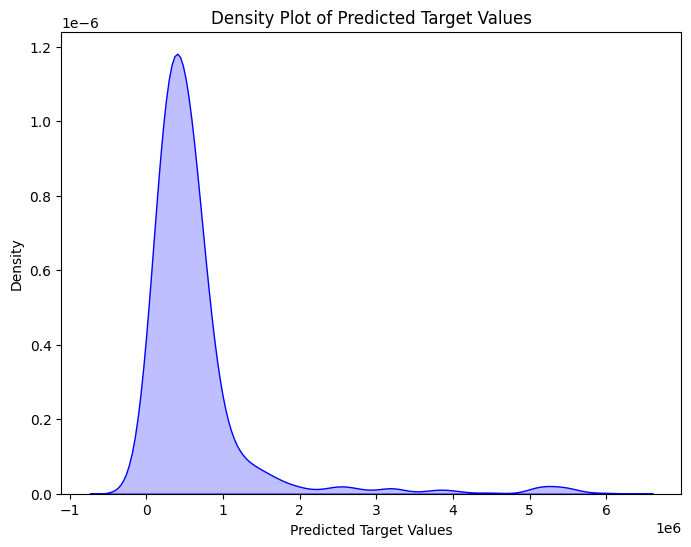

In [ ]:
plt.figure(figsize=(8, 6))
sb.kdeplot(prediction_on_test, color='blue', shade=True)
plt.title('Density Plot of Predicted Target Values')
plt.xlabel('Predicted Target Values')
plt.ylabel('Density')
plt.show()

From the graph, predicted target values have the highest density within the range 0 tp 2 on x-axis recording the value 1.19.

**REGRESSION TREE:**

In [ ]:
model = DecisionTreeRegressor(max_depth=3, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 363757.8738941575
RMSE: 697452.2709825648


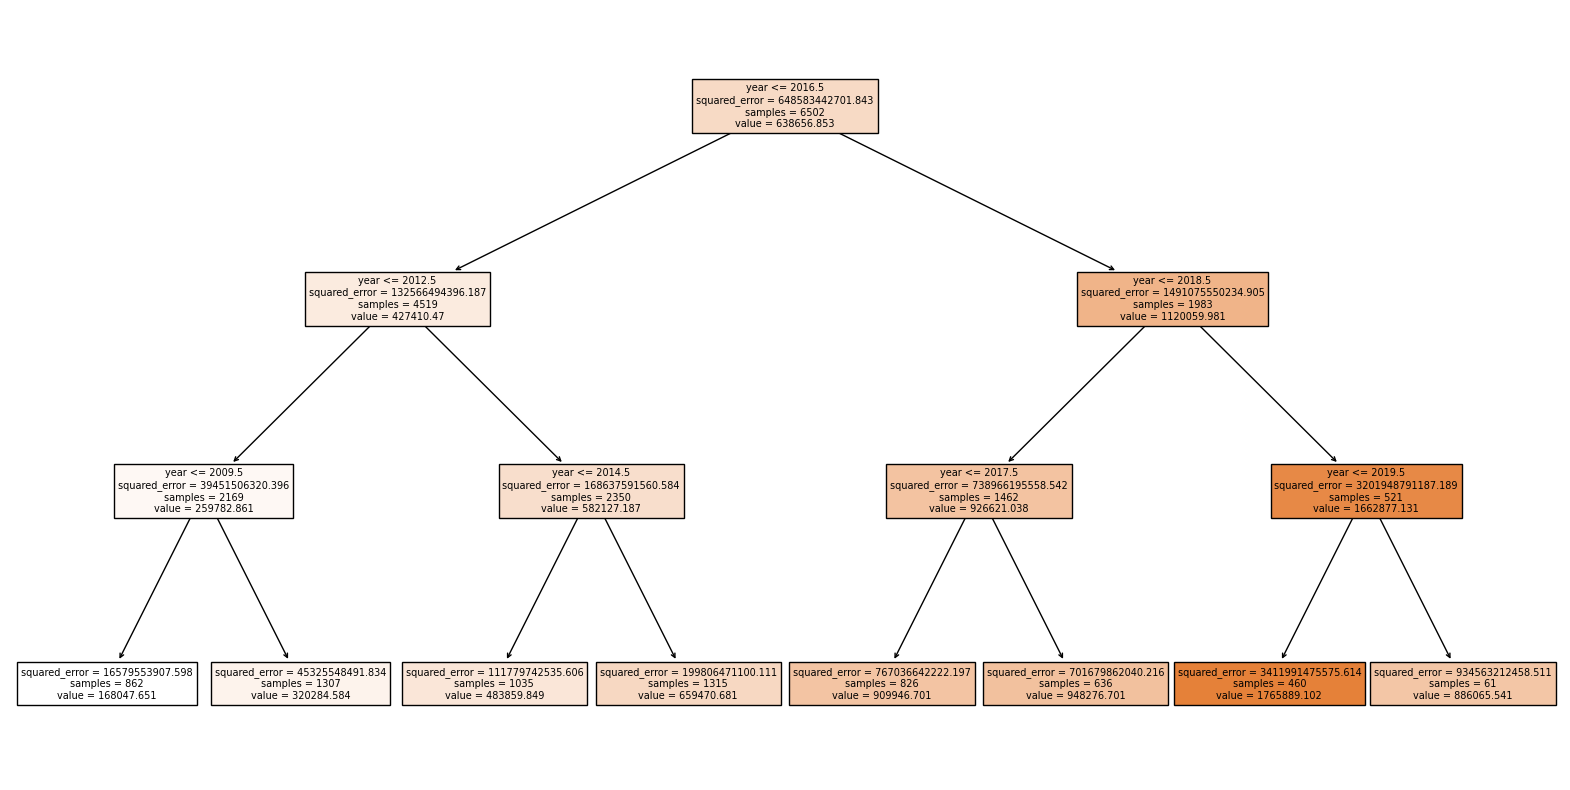

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

**SVR MODEL:**


In [ ]:
model4 = SVR(C=1.0)
model4.fit(X_train, y_train)

SVR()

In [ ]:
prediction_on_test = model4.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 378748.3310307392
RMSE: 830769.8724674768


In [ ]:
model4 = SVR(C=10.0)
model4.fit(X_train, y_train)

SVR(C=10.0)

In [ ]:
prediction_on_test = model4.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 377883.15549884114
RMSE: 829898.5961319475


**MLP REGRESSOR:**

In [ ]:
model5 = MLPRegressor(hidden_layer_sizes=(8,2,2), random_state=1)
model5.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(8, 2, 2), random_state=1)

In [ ]:
prediction_on_test = model5.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 408642.07838406897
RMSE: 750861.925329931


In [ ]:
model5 = MLPRegressor(hidden_layer_sizes=(32,4), random_state=1)
model5.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(32, 4), random_state=1)

In [ ]:
prediction_on_test = model5.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 408097.71082837693
RMSE: 749079.5876777349


**SIMPLE LINEAR REGRESSION:**

In [ ]:
X = car[['year']]
y = car['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 390753.2381359559
RMSE: 736815.8042390589


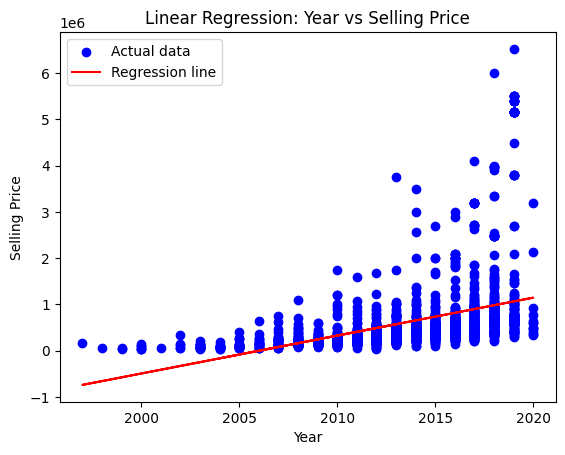

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')

plt.plot(X_test, predictions, color='red', label='Regression line')

plt.title('Linear Regression: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')

plt.legend()

plt.show()

From the above graph, selling price has increased gradually 2005 till 2020. 2016 and 2019 has more sales of cars.

**RESULTS AND EVALUATION:**

Comparing and evaluate the performance of the different models:

**Multiple Linear Regression:**
MAE: 97339.16
RMSE: 223074.27

**Regression Tree (Depth 3)**:MAE: 363757.87
RMSE: 697452.27

**SVR (C=1)**:MAE: 378748.33
RMSE: 830769.87

**SVR (C=10)**:MAE: 377883.16
RMSE: 829898.60

**MLP Regressor (8, 2, 2):**MAE: 408642.08
RMSE: 750861.93

**MLP Regressor (32, 4)**:MAE: 408097.71
RMSE: 749079.59

**Simple Linear Regression**:MAE: 390753.24
RMSE: 736815.80

**Evaluation:**

1. The Multiple Linear Regression model has the lowest MAE and RMSE among all the models, indicating better predictive performance.
2. The Regression Tree model has a relatively lower MAE compared to SVR and MLP models but a higher RMSE, indicating that it might be overfitting to the training data.
3. SVR models have higher MAE and RMSE compared to linear regression and regression tree models, suggesting they may not be as suitable for this dataset.
4. MLP models have higher MAE and RMSE compared to linear regression, indicating they might not be the best fit for this dataset either.

Overall, the **Multiple Linear Regression** model with the low MAE and RMSE values appears to be the most suitable for this dataset based on the provided evaluation metrics.

**CONCLUSION:**

Overall, selecting the most suitable regression model involves a balance between model complexity, feature selection, and performance metrics. The Multiple Linear Regression model emerges as the preferred choice for car price prediction in this analysis due to its simplicity and superior predictive accuracy. However, further refinement and exploration of alternative models may be necessary to achieve optimal results in real-world scenarios.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/wine.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/wine.ipynb to html
[NbConvertApp] Writing 3950323 bytes to /content/drive/MyDrive/Colab Notebooks/wine.html
